# Object Oriented Programming and Data Science (Probability & Statistics)

## Abstract

This document provides some examples of object oriented programming in Python with emphasis on inheritance.

It does so by building some "cells" that, among others, have the property of being capable of reproducing. This is totally fake, in the sense that we keep track of it just by an integer variable telling us how many times the cell "reproduced". 

After each reproduction step we say the cell progressed (aged) one additional generation. Example, a 7 "year" old cell means one that has reproduced 7 times.

In addition, we build cells that after each reproduction risk the chance to die.

We then simulate thousands of them and let them evolve for a given amount of generations. Then we look how long each lived. The lengths of their lives constitutes a random sampling that we then try to visualize and model mathematically.In this way we enter into the realms of probability theory and statistics.

This document assumes some basic knowledge of what an object is in OOP, the distinction between object and the class it belongs to and what the meaning of properties/attribute and methods of a class/object are.

Some topics we touch upon:

From CS, we see how to:

* define a **Class** in Python (aka _template_ for an object in OOP)
* make a class inherit properties and methods of another class
* use `getters` and `setters`
* make an object print itself in a human friendly way, thus, providing extra info about it
* pass functions to methods
* pass arbitrary dictionary of variables and their values to a function or an object (`**kargs`)
* etc.

From Data Science, we see how to:

* generate random numbers
* simulate things happening at random **with a given probability** (_Monte Carlo method_)
* collect and visualize a random sampling
* model that sampling using **Bayesian probability**.
* understand and calculate **conditional probabilities**.
* distinguish between a _Markov process_ (evolution) and a _Non-Markovian_ one.
* simulate, calculate and understand some basic concepts of **actuarial science**, like average lifetime and life expectancy.




##### updated Thu Jul 27th 2020


# Inheritance

Let's see what inheritance means in OOP. 

In order to do so, we will set the goal to play gods and "terra form" our notebook with a new breed of living beings.

We shall start from the level of "archaea" and try to see how one could in principle build the tree of life by building up "Life" on top of these primitive archaea.

## LivingBeing0

In [1]:
class LivingBeing0:
    '''
    Living Being ver 0

    grows      :: Bool (True)
    reproduced :: int (0)
    dead       :: Bool (False)

    __init__() :: None
    reproduce():: LivingBeing0
    isAlive()  :: Bool (not dead) 
    age()      :: Int  (reproduced)
         
    __eq__
    '''
    def __init__(self):
        self.grows = True
        self.reproduced = 0  #a proxy for ageing 
        self.dead = False
    def reproduce(self):
        if self.dead: return None
        self.reproduced += 1
        return LivingBeing0()
    def __eq__(self,B):
        if isinstance(B,self.__class__):
            if self.isAlive()==B.isAlive(): return True
        return False
    def isAlive(self):
        return not self.dead
    def age(self):
        return self.reproduced

In [2]:
archaea_goddess = LivingBeing0()
print(archaea_goddess.age())
archaea_goddess.reproduce()
print(archaea_goddess.age())
archaea_goddess.reproduce()
print(archaea_goddess.age())
archaea_goddess.reproduce()
print(archaea_goddess.age())
archaea_goddess.reproduce()
print(archaea_goddess.age())

0
1
2
3
4


# Introducing a finite life span of a living being

## A being with a finite life span

The original class of living beings do never die. They are eternal, like gods.

We will create a new class of living beings that show a finite life span. We do want however, that this new being shares the features we set for the previous beings. 

We could just copy paste the code above. However, if we decide to later modify all living beings such that they have a chance to die while reproducing, or being eaten by a predator, then we would need to copy the same code over to this new class.

Instead, we will use *Inheritance of Objects* to have this new class inherit all features of the previous one, and then we will modify them as needed, or simply introduce new features that the parent class lacks. 

The following class `LivingBeing00` is inheriting all properties and methods of `LivingBeing0`. As it's not modifying them nor introducing any new one, it is in fact *more or less the same* type of being.

In [3]:
class LivingBeing00(LivingBeing0): #Being 00 inheriting all features of being 0
    pass

cell00 = LivingBeing00()
cell00.isAlive()

True

### The Mundane Living Being

Let's now introduce a new class of living beings, that take a risk of dying each time they reproduce. We will implement this by adding a new method that kills the archea at random, with a probability that may increases with age.

We also need to modify the reproduce method inherited from the parent. This is done simply as if it were defined in this class for hte first time.

For the sake of clarity, we will copy again the parent constructor. <!--, changing its name to LivingBeing1. -->

In [4]:
class LivingBeing0:
    def __init__(self):
        self.grows = True
        self.reproduced = 0  #a proxy for ageing 
        self.dead = False
    def reproduce(self):     #We want to modify this part: make it die at random after each time it reproduces.
        if self.dead: return None
        self.reproduced += 1      
        return LivingBeing1()
    def __eq__(self,B):
        if isinstance(B,self.__class__):
            if self.isAlive()==B.isAlive(): return True
        return False
    def isAlive(self):
        return not self.dead
    def age(self):
        return self.reproduced

So big questions now:

- How to we inherit all features yet modify some of them?
- How do we make a cel die **_at random_** ?

## LivingBeing1: Template

Let's tackle the first question first: **call the init method of the parent class and rewrite any of its methods to suit the new class' needs**

In [5]:
class LivingBeing1(LivingBeing0): #constant prob of dying independently of age
    def __init__(self,p=0.1):
        #super(LivingBeing1,self).__init__() # if parent init requires arguments, you can pass them to this init call
        super().__init__() #no need to specify class of self, nor self itself: are picked up automatically
        self.probdying=p

    def reproduce(self):         #Now, when reproducing, we risk the chance to die
        if self.dead: return None  #hack-y
        self.reproduced += 1
        self.die()               # Will the cell die or not? tic-tac-tic-tac-tic-...
        return LivingBeing1()

    def die(self):
        #
        # MAKE self.dead = True AT RANDOM, WITH A PROBABILITY OF THIS HAPPENING EQUAL TO self.probdying
        #
        # How to do this? Read on below
        #
        return self.dead    

    def setRate(self,p):        #just to let us change p after having having instantiated the object
        if p>=0 and p<=1 : self.probdying = p
        return self.probdying


The methods `__init__` and `reproduce` already exist in the parent class. Yet we modify them here. 

The current init first does the same initialization as the parent class does; then it adds a new attribute to this class, namely, `probdying`.

In order to add the option of dying during reproduction, we must copy all the code of the parent modifying and/or adding what we need now, namely the call to `die`.

Finally we add a couple of new methods to this class, namely `die` and `setRate`, that didn't exist in the parent class. The first one for obvious reasons; the second, for practical purposes: it could come handy...

Now, to our second question, how to make the method `die` work... **at random**?

Let's first see some elementary math about that.

## How to pick a choice at random with a probability p

To set the tone of this section, consider the following problem. You are throwing darts on the wall blindfolded (don't do it at home, blindfolded or not!!). The wall is $3m$ wide. What is the chance that the dart falls on the left first $1m$ of the wall? Ans: $1/3$.

Another one: You have a open regular box (all sides equal) with sides of area $2m^2$. Inside, on the bottom of the cube you draw a circle of area $0.5m^2$. Then you start throwing marbles in the box. What is the chance that a marble first bounce lies inside the circle?

You want to decide at random whether you'll go to the cinema today or not. If possible, you want to use a regular die to help you make up your mind. But you also have a calculator that generates numbers between $0$ and $1$ at "random".

Consider the following cases:

1. Make your decision so as to have 1 to 1 (1:1) odds to go or not, i.e., so that the chance to go is $p=1/2$, or $50\%$. How to do it?  
   1. Solution: Throw the die. If the number you get is 3 or less you stay at home. Otherwise, you go to the cinema.  
2. Make your decision so that the odds to go are 2:4, i.e., so that the probability to go is $p=2/(2+4)$.  
   1. Solution: Throw the die. If the number you get is 1 or 2, go to the cinema; otherwise, don't.  
3. Make your decision so that the odds to go  are 3:2, i.e., so that the probability to go is $p=3/5=0.6$.  
   1. Solution: We can't use the die for this case. With the calculator we generate a random number $x\in [0,1]$. If $x\leq p$ you go to the cinema; otherwise, you go home. (aka, **_Monte Carlo_** algorithm)


### How to generate random numbers with python

In order to generate a random number x between 0 and 1, you can use:
```
import numpy as np
x = np.random.random()
```
Example:

In [6]:
import numpy as np
np.random.random()

0.4812745939001746

## Constant probability of dying: LivingBeing1

Let's introduce a chance that the living being dies at a given age. 

We will choose it to be a fixed likelihood at any specific age. Say 10%.

Now we know how to code for such a case.

In [7]:
class LivingBeing1(LivingBeing0): #constant prob of dying independently of age
    def __init__(self,p=0.1):
        #super(LivingBeing1,self).__init__() # if parent init requires arguments, you can pass them to this init call
        super().__init__() #no need to specify class of self, nor self itself: are picked up automatically
        self.probdying=p
        
        self._ver=1.0
        
    def reproduce(self):         #Now, when reproducing, we risk the chance to die
        if self.dead: return None  #hack-y
        self.reproduced += 1
        self.die()               # Will the cell die or not? tic-tac-tic-tac-tic-...
        return LivingBeing1()

    def die(self):
        if (np.random.random()< self.probdying) : self.dead=True   # a likelihood p of dying
        return self.dead    

    def setp(self,p):        #just to let us change p after having having instantiated the object
        if p>=0 and p<=1 : self.probdying = p
        return self.probdying

    @property               #We add a version number that we want it to be hard coded. Hence use getter&setter
    def ver(self): return self._ver
    @ver.setter
    def ver(self,x): pass

In [8]:
c=LivingBeing1()
print(c.isAlive(),c.ver)

True 1.0


## Simulating the life of primitive living beings

We are at our biology lab where we collated a culture of Ncell specimens of our living beings and we let this ensemble of cells evolve. While they are alive, we will make them reproduce.

This time, after each reproduction step, the cells die at a random with a fixed probability each time.

We will write down the number of cells that die at any given age. Then we will plot those values on a histogram plot and finally we will compare it to a theoretical distribution of life spans. 

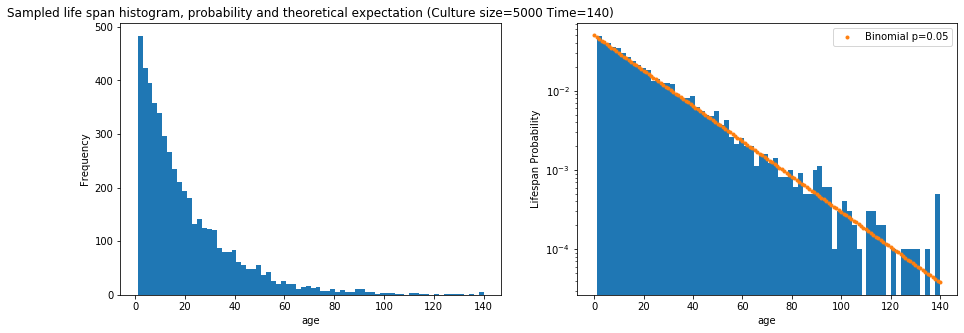

In [9]:
def createCulture(Ncells,Being,**kargs):  #using **kargs allows us to choose to pass or not additional arguments
    culture=[]                            # when calling it. For instance, the constant prob of dying, p.
    for i in range(Ncells):
        culture.append(Being(**kargs))
    return np.array(culture)

Ncells=5000
p=0.05
ensemble = createCulture(Ncells,LivingBeing1, p=p)
Time = int(7/p)
#generations = np.arange(Time)

def evolve(c,time=Time):
    for i in range(time):
        c.reproduce()
        if not c.isAlive(): return c.age()
    return c.age()


#evolve each cell in the culture and write down the age at which it dies.
ages = np.array([ evolve(c) for c in ensemble]) 

#Binomial
bino=(lambda n,a: a*(1-a)**n)
#Exponential
expo = (lambda n,a: np.exp(-a*n)*a/(1-np.exp(-a*Time)) )

Agerange = range(0,max(ages)+1)

#Plotting histogram of life spans in our culture
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(ages,bins=int(Time/2))
plt.xlabel('age')
plt.ylabel('Frequency')
#plt.title('Life span histogram (Culture size='+str(Ncells)+')')
plt.title('Sampled life span histogram, probability and theoretical expectation'+
          ' (Culture size='+str(Ncells)+
          ' Time='+str(Time)+
          ')')

#Plotting sampled relative frequency and comparing it to the theoretical distribution
plt.subplot(1,2,2)
density=True
n, bins, patches = plt.hist(ages,bins=int(Time/2),density=density)

#print('bins=',bins[:5],bins[-5:])

p = ensemble[0].probdying

expoplt=[ expo(age,p) for age in Agerange]
binoplt=[ bino(age,p) for age in Agerange]

#plt.plot(ages,expoplt,'.')
plt.plot(Agerange,binoplt,'.',label='Binomial p='+str(p))

plt.legend()
plt.yscale('log')
plt.xlabel('age')

ylab='Lifespan Probability'*density+(1-density)*'Frenquency'
plt.ylabel(ylab)

plt.show()

## Create a BIO-LAB

The previous simulation involved defining a couple of functions and running a list comprehension. Then we set up all bits and pieces to graph the results. Along the way, we defined some useful math (probability) functions. It was simple. But it's a messy code.

Much better is to wrap the functionality within a class. We'll do that now

In [10]:
#classes Culture , BioLab

class Culture:
    '''
    Culture(Being, Ncells=5000, **kargs)
    
    culture :: [Being]
    ages    :: [age]
    Beings  :: Being The class
    BeingKargs :: kargs
    
    TimeEvolution = 50
    
    reSetCulture(Ncells=None)
    runCulture(time=TimeEvolution)
    
    being() :: culture[0]
    '''
    def __init__(self,Being,Ncells=5000,**kargs):
        self.Ncells = Ncells
        self.Beings = Being
        self.BeingKargs = kargs
        self.culture = []
        self.ages = []
        self.TimeEvolution = 50 #potential new generations
        self.reSetCulture(Ncells)
        
    def reSetCulture(self,Ncells=None):
        if not Ncells: Ncells = self.Ncells
        
        self.culture = self.createCulture(Ncells,self.Beings,**self.BeingKargs)
        
    def createCulture(self,Ncells,Being,**kargs):  
        culture=[]                           
        for i in range(Ncells):
            culture.append(Being(**kargs))
        if culture[0].ver==1:
            minTimeEv = int(7/culture[0].probdying)
            self.TimeEvolution = max(minTimeEv,self.TimeEvolution)
            print('# Culture : Min recommended evolution time '+str(minTimeEv))
        return np.array(culture)

    def runCulture(self,time=None):
        if time : self.TimeEvolution = time
        print('#DEBUG : runCulture time '+str(self.TimeEvolution))
        #evolve each cell in the culture and write down the age at which it dies.
        self.ages = np.array([ self.evolve(c) for c in self.culture]) 
        print('#DEBUG : runCulture min/max ages '+str(min(self.ages))+' '+str(max(self.ages)))

        
    def evolve(self, c ):
        #print('#DEBUG: evolve : time '+str(self.TimeEvolution))
        for i in range(self.TimeEvolution):
            c.reproduce()
            if not c.isAlive(): return c.age()
        return c.age()

    @property
    def being(self):
        return self.culture[0]


class BioLab:
    '''
    culture
    
    runCulture(time=None)
    plotResults()
    '''
    def __init__(self):
        self.culture = None
        self.cultureRun = False
        
    def runCulture(self, time=None):
        if type(self.culture) == None:
            print('Culture needs to be set before being able to run it')
            assert False
        self.culture.runCulture(time)
        if len(self.culture.ages) > 0 : self.cultureRun = True
        return self.cultureRun
        
    def plotResults(self,densityYscale='log'):    
        if densityYscale != 'log': densityYscale='linear'
        print( 'Living beings ver '+str(self.culture.being.ver ) )
        if not self.cultureRun :
            print('No data available. Run culture first')
            assert False
        #
        Ncells = self.culture.Ncells
        Time = self.culture.TimeEvolution
        ages = self.culture.ages
        p = self.culture.being.probdying
        
        Agerange = range(0,max(ages)+1)
        
        #Plotting histogram of life spans in our culture
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        plt.hist(ages,bins=int(Time/2))
        plt.xlabel('age')
        plt.ylabel('Frequency')
        #plt.title('Life span histogram (Culture size='+str(Ncells)+')')
        plt.title('Sampled life span histogram, probability and theoretical expectation (Culture size='+
                  str(Ncells)+
                  ' p='+str(p)+
                  ' Time='+str(Time)+
                  ')')


        #Plotting sampled relative frequency and comparing it to the theoretical distribution
        plt.subplot(1,2,2)
        density=True
        n, bins, patches = plt.hist(ages,bins=int(Time/2),density=density)
        #print('bins=',bins[:5],bins[-5:])

        # Theoretical analysis -hack ; hard coded for now
        #Binomial
        bino=(lambda n,a: a*(1-a)**n)
        
        binoplt=[ bino(age,p) for age in Agerange]

        # Actual plotting
        plt.plot(Agerange,binoplt,'.', label='Binomial p='+str(p))

        
        plt.legend()
        plt.yscale(densityYscale)
        plt.xlabel('age')

        ylab='Lifespan Probability'*density+(1-density)*'Frequency'
        plt.ylabel(ylab)

        plt.show()

# Culture : Min recommended evolution time 70
#DEBUG : runCulture time 70
#DEBUG : runCulture min/max ages 1 70
Living beings ver 1.0


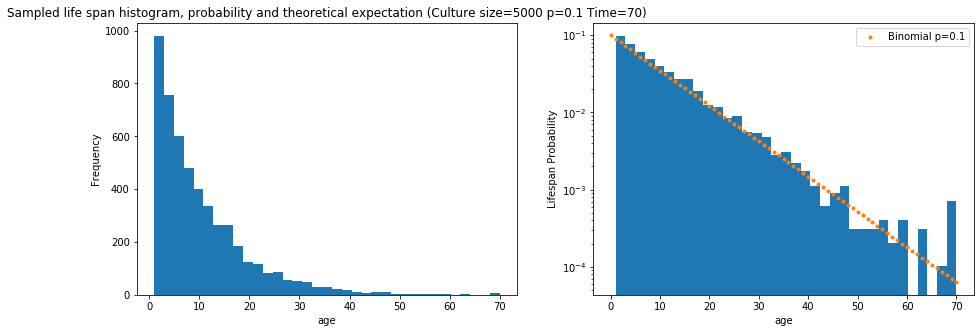

In [11]:
lab = BioLab()

lab.culture = Culture(LivingBeing1)
lab.runCulture()
lab.plotResults()


# Culture : Min recommended evolution time 140
#DEBUG : runCulture time 150
#DEBUG : runCulture min/max ages 1 150
Living beings ver 1.0


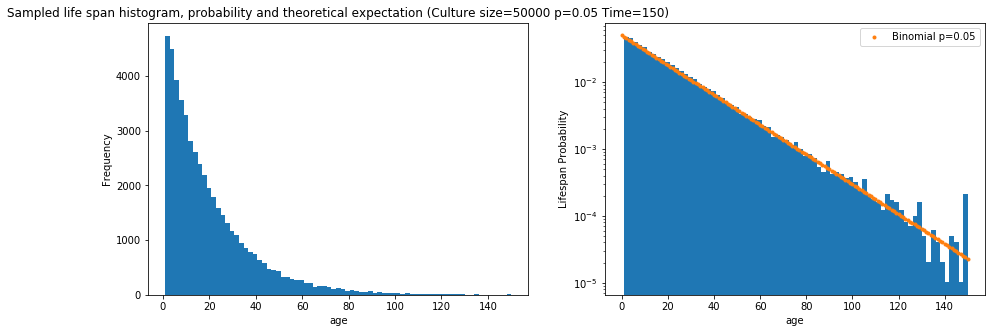

In [12]:
#lab = BioLab()

lab.culture = Culture(LivingBeing1,Ncells=50000,p=0.05)
lab.runCulture(time=150)
lab.plotResults()


# More complex life-expectancies


Let's say that, with probability $1$, i.e., with certainty, no cell ever survives beyond ${\cal A}$ generations.

What we would like to have is that the probability of dying after a given age becomes closer and closer to 1 with the age of the living
being. 

However, that previous sentence has absolutely **_NO meaning at all until we define precisely an actual random experiment associated to that statement_**.

> The **random experiment** will be: at each time $age$ we throw a die. The cell dies with probability $\theta(age)$ and survives that time with probability $1-\theta(age)$. 
> If the cell dies, we take note of the age when it happens and stop its evolution. 

Some functions that behaves like this are the following :

1. $\theta(age)\,=\,\frac{age}{A}$
3. $\theta(age)\,=\,\frac{1}{2}\,\left(1\,+\,\tanh (\frac{\left[age-A/2\right]}{r\,A})\right)$
2. $\theta(age)\,=\,{\cal N}\,\frac{r\cdot\,age}{1\,+\,r\cdot\,age}\quad\phantom{a}$ where ${\cal N}=\frac{1+r\,A}{r\,A}$ 

all satisfying the requirement that at age $A$, the probability of dying is $\theta(A)\,= 1$. 

But dying exactly at age $i$ means, the subject _didn't die at any of the previous generations_. In other words, this is the event
$$\urcorner D_1\,\urcorner D_2\,\cdots\,\urcorner D_{i-1}\,D_i$$
where $D_i$ is the event of finding the cell dead at generation $i$.

Hence $\theta_i$ is actually **_conditioned_** on not having died before, whence
$$\theta_i=Prob(D_i|I\urcorner D_1\,\urcorner D_2\,\cdots\,\urcorner D_{i-1})$$
where $I$ refers to all implicit information on how the cells evolve, reproduce and die. By construction, it satisfies 

* $\theta_A\,=\,1$
* $\theta_0\,=\,0$

$\theta_i$ is the probability we need to use in our monte carlo procedure now. 

By analogy with the Bernoulli's urn, the plausibility of living only till age $i$ (or exactly a life span of $i$ years) will be:

$$P(\urcorner D_1\,\urcorner D_2\,\cdots\,\urcorner D_{i-1}\,D_i|I)\,  =  $$
$$P(D_i|I\urcorner D_1\,\cdots\,\urcorner D_{i-1})\,P(\urcorner D_{i-1}|I\urcorner D_1\,\cdots\,\urcorner D_{i-2})  \cdots  P(\urcorner D_{3}|I\urcorner D_1\,\urcorner D_{2})\,P(\urcorner D_2|I\urcorner D_1)\,P(\urcorner D_1|I)$$

hence

$$P(\urcorner D_1\,\urcorner D_2\,\cdots\,\urcorner D_{i-1}\,D_i|I)\,=\,\theta_i\,\Pi_{k=0}^{k=i-1}(1\,-\,\theta_k)$$.

We may call this the life-span probability or, at times, also, the life expectancy. Thus we define $$\Phi_i\,=\,\theta_i\,\Pi_{k=0}^{k=i-1}(1-\theta_k)$$ as the probability to die exactly at age $i$


Let's fix ${\cal A}=100$.

Wacht the following plots

----





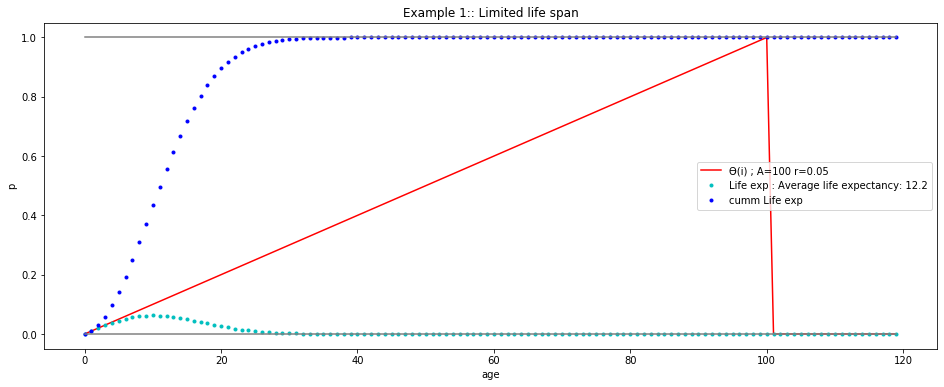

In [201]:
import matplotlib.pyplot as plt

import numpy as np

theta2 = (lambda x,r: x/Alim * (1+r*Alim)/(1+r*x) )

#p = (lambda x,r: (1+r*Alim)/(Alim*(1+r*x)**2) )
#p = (lambda x,r: ( (1+r*Alim)/( Alim*(1+r*x)*(1+r*(x-1)) ) ) )
def theta(i,r,Alim):
    return (i>0 and i<=Alim)*i*1.0/Alim
    #return (x>0 and x<=Alim)*( (1+r*Alim)/( Alim*(1+r*x)*(1+r*(x-1)) ) )
def theta_v(x,r,Alim):
    return x*1.0/Alim
    #return ( (1+r*Alim)/( Alim*(1+r*x)*(1+r*(x-1)) ) )

def rho(i,r,Alim):
    return (i>0 and i<=Alim)*1.0/Alim
    #if m==0: return 0
    ##return (m<=Alim)*p(m,r) + f(m-1,r) 
    #return p(m,r,Alim) + f(m-1,r,Alim) 
def rho2(i,r,Alim):
    if i<=0: return 0
    return (theta(i,r,Alim) * (1-theta(i-1,r,Alim)) )/( 1 - theta(i-1,r,Alim) * ( 1-theta(i-2,r,Alim) ) )

def gamma(i,r,Alim):
    return (1.0-(-1.0/Alim)**i)/(1+Alim)
def gamma2(i,r,Alim):
    return theta(i,r,Alim)*(1-theta(i-1,r,Alim)) 

def p_lifexp(age,r,Alim):  #Life expectancy prob. Scalar: p_lifexp =  p(age) Prod_i=0^i=age-1 ( 1 - p(i) )
    if age==0 or theta(age,r,Alim)==0 : return 0
    sum=np.log(theta(age,r,Alim)) 
    y=1
    while ( y < age):
        sum += np.log(1-theta(y,r,Alim))
        y += 1
    return np.exp( sum )

def p_lifexp_v(ages,r,Alim):
    return [p_lifexp(age,r,Alim) for age in ages ]

def cf(age,r,Alim,p):
    sum =0
    for i in range(age+1):
        sum += p(i,r,Alim)
    return sum

#Plot functions
plt.figure(figsize=(16,6))


#max age possible
Alim=100
X = np.arange(0,Alim+20)

#Example 1
r=0.05
Yt  = [ theta   (x,r=r,Alim=Alim) for x in X]
#Yr1 = [ rho     (x,r=r,Alim=Alim) for x in X]
#Yr2 = [ rho2    (x,r=r,Alim=Alim) for x in X]
#Yg1 = [ gamma   (x,r=r,Alim=Alim) for x in X]
#Yg2 = [ gamma2  (x,r=r,Alim=Alim) for x in X]
Ys  = [ p_lifexp(x,r=r,Alim=Alim) for x in X]
Yc  = [ cf (x,r=r,Alim=Alim,p=p_lifexp) for x in X]
averageAge = np.sum([ x*p for (x,p) in zip(X,Ys)])

plt.plot(X,Yt,'r', label='\u03f4(i) ; A='+str(Alim)+' r='+str(r))
#plt.plot(X,Yr1, 'xr',label='\u03c11(i) ')
#plt.plot(X,Yr2, 'xm',label='\u03c12(i) ')
#plt.plot(X,Yg1, 'or',label='\u03b31(i) ')
#plt.plot(X,Yg2, 'om',label='\u03b32(i) ')


#plt.plot(X,Prob(X,r), '.r')
plt.plot(X,Ys, '.c', label='Life exp : Average life expectancy: {:.1f}'.format(averageAge))
plt.plot(X,Yc, '.b', label='cumm Life exp ')

'''
#Example 2
r=0.71*(1-1/Alim)
Yt  = [ theta   (x,r=r,Alim=Alim) for x in X]
Yr1 = [ rho     (x,r=r,Alim=Alim) for x in X]
Yr2 = [ rho2    (x,r=r,Alim=Alim) for x in X]
Yg1 = [ gamma   (x,r=r,Alim=Alim) for x in X]
Yg2 = [ gamma2  (x,r=r,Alim=Alim) for x in X]
Ys  = [ p_lifexp(x,r=r,Alim=Alim) for x in X]
Yc  = [ cf (x,r=r,Alim=Alim,p=p_lifexp) for x in X]
averageAge = np.sum([ x*p for (x,p) in zip(X,Ys)])


#plt.plot(X,Yt,'r', label='\u03f4(i) ; A='+str(Alim)+' r='+str(r))
#plt.plot(X,Yr1, 'xr',label='\u03c11(i) ')
#plt.plot(X,Yr2, 'xm',label='\u03c12(i) ')
#plt.plot(X,Yg1, 'or',label='\u03b31(i) ')
#plt.plot(X,Yg2, 'om',label='\u03b32(i) ')
'''


y1=np.ones(X.size)
y0=np.zeros(X.size)
plt.plot(X,y1,color='grey')
plt.plot(X,y0,color='grey')
#plt.yscale('log')
#plt.ylim(0.5,1.01)
#plt.ylim(0.,.5)
#plt.ylim(0.,.1)
#plt.xlim(0.,50)
plt.legend()
plt.xlabel('age')
plt.ylabel('p')
plt.title('Example 1:: Limited life span')
plt.show()

#print( Norm(r),sum(p(x,r) for x in range(0,Alim+1) ) )

## Varying probability of dying

Let's now implement a living being for which the risk of dying varies with age according to the above function $theta(age)$.

We will use inherence taking as parent class our LivingBeing1. For the sake of clarity we copy again the code of the parent class modifying it slightly to gain more generality. 

In [14]:
class LivingBeing1(LivingBeing0): #constant prob of dying independently of age
    '''
    probdying       :: float
    ver             :: str  (1.0)
    self.die()      :: dead
    p(age)          :: int -> float
    p_np(ages)      :: [int] -> [float]
    pc(age)         :: int -> float
    p_surv(age)     :: int -> float
    p_surv_np(ages) :: [int] -> [float]
    setp(p)         :: float -> float (probdying)
    __init__(p)     :: float -> None
    '''
    def __init__(self,p=0.1):
        #super(LivingBeing1,self).__init__() # if parent init requires arguments, you can pass them to this init call
        super().__init__() #no need to specify class of self, nor self itself: are picked up automatically
        self.probdying=p
        self._ver="1.0"
        
    def reproduce(self):         #Now, when reproducing, we risk the chance to die
        if self.dead: return None  #hack-y
        self.reproduced += 1
        self.die()               # Will the cell die or not? tic-tac-tic-tac-tic-...
        return type(self)()  #type(self) is the class LivingBeing2, thus we're instantiating an object of that = class
        # was before return LivingBeing1()

    #Probability of dying at a given age
    def theta(self,age=0): #scalar version
        return self.probdying
    
    def theta_np(self,ages): #wrapper version for numpy arrays. Default doesn't work with combined contions on the each value of an array
        return [self.theta(age) for age in ages]
    #Cummulative prob of dying, i.e., prob dying within first age generations
    def cf(self,age):
        pc=0
        y=0
        while y<=age:
            pc += self.p_lifexp(y)
            y += 1
        return pc
    #Survival probability up to a given age
    def p_lifexp(self,age):  #Scalar: p_surv =  p(age) Prod_i=0^i=age-1 ( 1 - p(i) )
        if age==0 or self.theta(age)==0 : return 0
        sum=np.log(self.theta(age)) 
        y=1
        while ( y < age and self.theta(y)<1 ):
            sum += np.log(1-self.theta(y))
            y += 1
        return np.exp( sum )
    
    def p_lifexp_np(self,ages): #vector (for numpy)
        return [self.p_lifexp(age) for age in ages ]

        

    def die(self):
        if np.random.random()< self.theta(self.age())  : self.dead=True   # a likelihood p of dying
        return self.dead    

    def setp(self,p):        #just to let us change p after having having instantiated the object
        if p>=0 and p<=1 : self.probdying = p
        return self.probdying

    @property               #We add a version number that we want it to be hard coded. Hence use getter&setter
    def ver(self): return self._ver
    @ver.setter
    def ver(self,x): pass

Notice the new return statement in `reproduce`: We do not explicitly call the class name constructor as before, namely, LivingBeing1(). 

Instead, we query the same object to tell us its class type (`type(self)`) and we call that!

We also introduced a new method `theta` that gives the probability of our living being dying at any given age. In this case, that's a constant equal to `probdying`. For the following types of living beings it won't be. Hence this generalization will come handy.

Related to that, we also modified the `die` method to take into consideration that our Monte Carlo step now has to call this probability function `p`.

## LivingBeing2

Our new class needs thus not modify these method, except for `theta` itself.

In [15]:
class LivingBeing2(LivingBeing1):
    '''
    r                                  :: float (0.05)
    Alim                               :: int   (100)
    kargs                              :: dic
    __init__(r=0.05,Alim=100,**kargs)
    '''
    def __init__(self,r=0.05,Alim=100,**kargs):
        super().__init__(**kargs)
        self.r=r
        self.Alim=Alim
        self._ver=2.0
        self.kargs=kargs

    def theta(self, age): #scalar version
        return (age<=self.Alim)*age*1.0/self.Alim
        #r = self.r
        #Alim = self.Alim
        #age = self.age()
        #return (age>0 and age<=Alim)*( (1.0+r*Alim)/( Alim * (1.0+r*age) * (1.0+r*(age-1)) ) )


In [16]:
c=LivingBeing2(r=0.71,Alim=100)

print(c.theta(5),c.cf(5),c.p_lifexp(5))

0.05 0.14172227199999998 0.04517251199999999


In [17]:
c=LivingBeing1(p=0.05)
print(c.theta(5), c.cf(5), c.p_lifexp(5), c.theta(5)*(1-c.theta(5))**4 )

0.05 0.2262190625 0.0407253125 0.0407253125


In [18]:
r=0.75
cell1 = LivingBeing2(r=r,Alim=100)

print('Age\tAlive')
for i in range(20):
    print(cell1.age(),cell1.isAlive(),sep='\t')
    cell1.reproduce()

Age	Alive
0	True
1	False
1	False
1	False
1	False
1	False
1	False
1	False
1	False
1	False
1	False
1	False
1	False
1	False
1	False
1	False
1	False
1	False
1	False
1	False


Let's simulate a bunch of them and sample their life spans.

In [19]:
Ncells=15000
Alim=100
r=0.71*(1-1/Alim)
culture=[]
for i in range(Ncells):
    culture.append(LivingBeing2(r=r,Alim=Alim))



ensemble = np.array(culture)
Time = Alim +1

#evolve each cell in the culture and write down the age at which it dies.
ages = np.array([ evolve(c) for c in ensemble]) 


print('min/max ',min(ages),max(ages) )

min/max  1 41


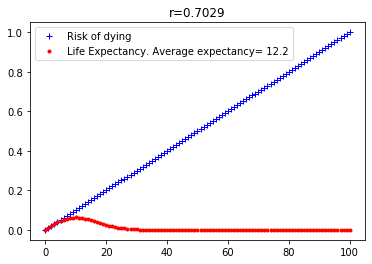

In [20]:
#Check we get the same as before
X=list(range(Time))
d=[ ensemble[0].theta(age) for age in X]
ds=[ ensemble[0].p_lifexp(age) for age in X]

plt.plot(X,d,'+b', label='Risk of dying')
plt.plot(X,ds,'.r',label='Life Expectancy. Average expectancy= {:.1f}'.format(np.sum([x*p for (x,p) in zip(X,ds)])))
plt.title('r='+str(r))
plt.legend()
#plt.yscale('log')

Now let's plot the distribution of ages we obtain when simulating that ensemble of cells.

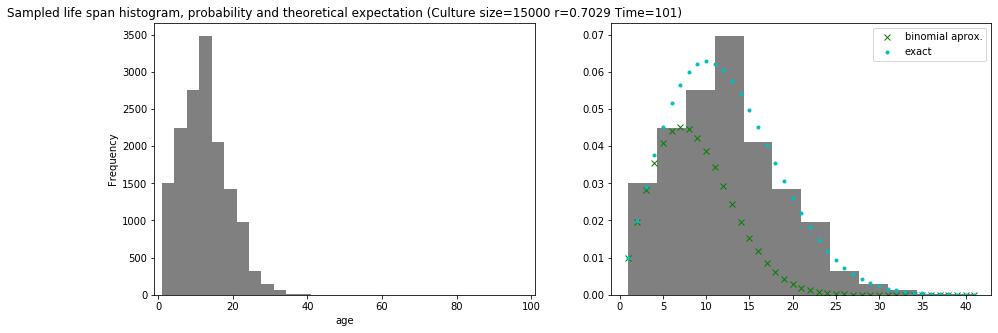

In [21]:
def fac(n): #factorial
    f=1
    for i in range(1,n+1):
        f *= i
    return f

#prodt
def prodt(n,r,m=0,Alim=100):
    if m==0: return theta(n,r,Alim)*prodt(n,r,m=1,Alim=Alim)
    if n==0 : return 1
    return (1-theta(n-1,r,Alim))*prodt(n-1,r,m=1,Alim=Alim)
def logprodt(n,r,Alim):
    if n==0: return 0
    sum=np.log(theta(n,r,Alim))
    i=1
    while ( i < n ):
        sum += np.log(1-p(i,r,Alim))
        i += 1
    return np.exp( sum )

#Binomial
bino=(lambda a,p: (p>0)*p*(1-p)**(a-1) + (p==0)*1.0  )

#Poisson distribution
pois=(lambda n,a: (a**n * np.exp(-a))/fac(n) )
#Exponential
expo = (lambda n,a: np.exp(-a*n)*a/(1-np.exp(-a*Alim)) )
# 
def prdai(i,Alim):
    if i<=1 : return (i==1)
    #return (Alim-i+1)*prdai(i-1,Alim)
    pd=1
    for k in range(1,i):
        pd *= (Alim-k)
    return pd

h = (lambda i,A: i/A**i * prdai(i,A))

#Plotting histogram of life spans in our culture
xlim=Time#95

Agerange = range(1,max(ages)+1)

#mask = (ages) < xlim
#ages = ages[mask]

plt.figure(figsize=(15,5))
sampleColor='grey'
plt.subplot(1,2,1)
plt.hist(ages,bins=int(Time/8),color=sampleColor)
plt.xlabel('age')
plt.xlim(right=xlim)
plt.ylabel('Frequency')
#plt.title('Life span histogram (Culture size='+str(Ncells)+')')
plt.title('Sampled life span histogram, probability and theoretical expectation (Culture size='+str(Ncells)+
          ' r='+str(r)+
          ' Time='+str(Time)+
          ')')

#Plotting sampled relative frequency and comparing it to the theoretical distribution
poismean=1
plt.subplot(1,2,2)
density=True
n, bins, patches = plt.hist(ages,bins=int(Time/8),density=density,color=sampleColor)
#print('bins=',bins)


#fr=Ncells-density*(Ncells-1)
#poisplt=[ fr*pois(age,poismean) for age in ages]
#expoplt=[ expo(age,r) for age in ages]
binopltt=[ bino(age,ensemble[0].theta(age)) for age in Agerange]
#prodtplt=[ (age>0)*p(age,r,Alim=Alim)*prodt(age,r) for age in ages]
#logpdplt=[ logprodt(age,r,Alim) for age in ages ]
#logpdplt=p_surv_v(ages,r,Alim=Alim)
#logpdplt=[ f(age,r,Alim) for age in ages ]
#logpdplt=[ h(age,Alim) for age in ages ]
#exact=[ h(age,Alim) for age in Agerange]
exact=[ ensemble[0].p_lifexp(age) for age in Agerange]


#plt.plot(ages,poisplt,'.')
#plt.plot(ages,expoplt,'.',label='exponential')
plt.plot(Agerange,binopltt,'xg',label='binomial aprox.')
#plt.plot(ages,logpdplt,'.c',label='exact')
#plt.plot(ages,prodtplt,'.c',label='exact')
plt.plot(Agerange,exact,'.c',label='exact')

plt.legend()

#plt.yscale('log')

plt.show()

But we can also use our `BioLab` to carry out such a simulation without having to worry about all that code for plotting: the BioLab does it for us.

#DEBUG : runCulture time 150
#DEBUG : runCulture min/max ages 1 47
Living beings ver 2.0


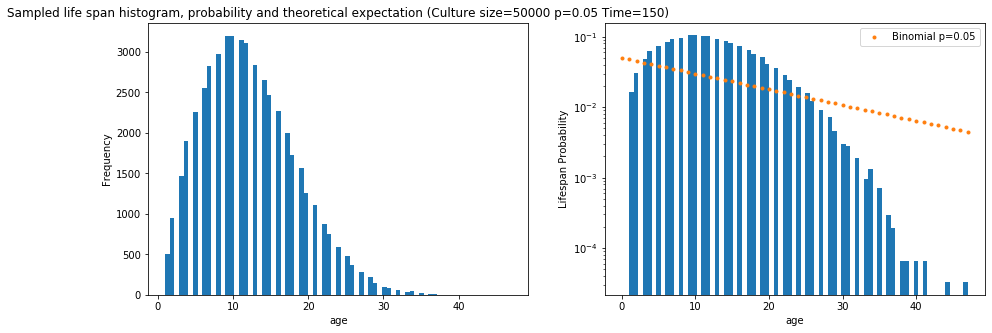

Living beings ver 2.0


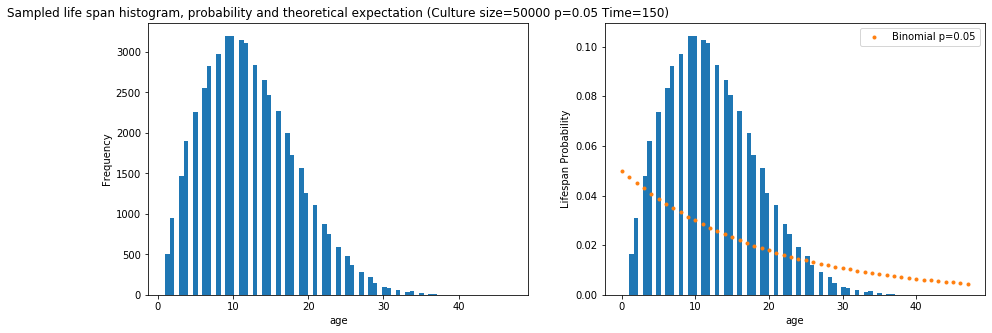

In [22]:
lab2 = BioLab()

lab2.culture = Culture(LivingBeing2,Ncells=50000,p=0.05,r=r)
lab2.runCulture(time=150)
lab2.plotResults()
lab2.plotResults(densityYscale='li')



Well, some is off with the theoretical expectations. Read on.

## BIO-LAB 2.0

Clearly, `BioLab` needs to be adapted for its correct handling of `LivingBeing2` beings.

For the sake of clarity we'll copy again the class culture.

In [23]:

class Culture:
    '''
    Culture(Being, Ncells=5000, **kargs)
    
    culture :: [Being]
    ages    :: [age]
    Beings  :: Being The class
    BeingKargs :: kargs
    
    TimeEvolution = 50
    
    reSetCulture(Ncells=None)
    runCulture(time=TimeEvolution)
    
    being() :: culture[0]
    '''
    def __init__(self,Being,Ncells=5000,**kargs):
        self.Ncells = Ncells
        self.Beings = Being
        self.BeingKargs = kargs
        self.culture = []
        self.ages = []
        self.TimeEvolution = 50 #potential new generations
        self.reSetCulture(Ncells)
        
    def reSetCulture(self,Ncells=None):
        if not Ncells: Ncells = self.Ncells
        
        self.culture = self.createCulture(Ncells,self.Beings,**self.BeingKargs)
        
    def createCulture(self,Ncells,Being,**kargs):  
        print('#DEBUG : createCulture : Being.kargs= '+str(kargs))
        culture=[]                           
        for i in range(Ncells):
            culture.append(Being(**kargs))
        if culture[0].ver==1:
            minTimeEv = int(7/culture[0].probdying)
            self.TimeEvolution = max(minTimeEv,self.TimeEvolution)
            print('# Culture : Min recommended evolution time '+str(minTimeEv))
        elif culture[0].ver>1:
            self.TimeEvolution = culture[0].Alim
        return np.array(culture)

    def runCulture(self,time=None):
        if time : self.TimeEvolution = time
        print('#DEBUG : runCulture time '+str(self.TimeEvolution))
        #evolve each cell in the culture and write down the age at which it dies.
        self.ages = np.array([ self.evolve(c) for c in self.culture]) 
        print('#DEBUG : runCulture min/max ages '+str(min(self.ages))+' '+str(max(self.ages)))

        
    def evolve(self, c ):
        #print('#DEBUG: evolve : time '+str(self.TimeEvolution))
        for i in range(self.TimeEvolution):
            c.reproduce()
            if not c.isAlive(): return c.age()
        return c.age()

    @property
    def being(self):
        return self.culture[0]



class BioLab:
    '''
    culture
    
    runCulture(time=None)
    plotResults()
    '''
    def __init__(self):
        self.culture = None
        self.cultureRun = False
        
    def runCulture(self, time=None):
        if type(self.culture) == None:
            print('Culture needs to be set before being able to run it')
            assert False
        self.culture.runCulture(time)
        if len(self.culture.ages) > 0 : self.cultureRun = True
        return self.cultureRun
        
    def plotResults(self, densityYscale='log',binsize=8):
        '''
        densityYscale :: string ('log'/'linear')
        binsize       :: int    [1,Time]
        '''
        if not self.cultureRun :
            print('No data available. Run culture first')
            assert False
        if densityYscale != 'log': densityYscale='linear'
        #
        Ncells = self.culture.Ncells
        Time = self.culture.TimeEvolution
        ages = self.culture.ages
        ver = self.culture.being.ver
        po = self.culture.being.probdying
        theta  = self.culture.being.theta
        p_lifexp = self.culture.being.p_lifexp
        pars = self.culture.being.kargs
        #if ver > 1.0:
        #    pars['r']=self.culture.being.r
            
        Agerange = range(1,max(ages)+1)
        
        #Plotting histogram of life spans in our culture
        samplesColor='grey'
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        plt.hist(ages,bins=int(Time/binsize),color=samplesColor)
        plt.xlabel('age')
        plt.ylabel('Frequency')
        #plt.title('Life span histogram (Culture size='+str(Ncells)+')')
        plt.title('Sampled life span histogram, probability and theoretical expectation (Culture size='+
                  str(Ncells)+
                  #' p='+str(po)+
                  ' Time='+str(Time)+
                  ' '+str(pars)+
                  ' Actual Average LE= {:.1f}'.format(np.mean(ages)) +
                  ')')


        #Plotting sampled relative frequency and comparing it to the theoretical distribution
        plt.subplot(1,2,2)
        density=True
        n, bins, patches = plt.hist(ages,bins=int(Time/binsize),density=density,color=samplesColor)
        #print('bins=',bins[:5],bins[-5:])

        # Theoretical analysis -hack ; hard coded for now
        #Binomial
        bino=(lambda n,a: a*(1-a)**n)
        binoplt=[ bino(age,theta(age)) for age in Agerange]
        
        #exact
        exact=[ p_lifexp(age) for age in Agerange]





        # Actual plotting
        #plt.plot(ages,binoplt,'.', label='Binomial p='+str(po))
        plt.plot(Agerange,binoplt,'.g',label='binomial aprox.')
        plt.plot(Agerange,exact,'.c',label='exact')
        
        plt.legend()
        plt.yscale(densityYscale)
        plt.xlabel('age')

        ylab='Lifespan Probability'*density+(1-density)*'Frequency'
        plt.ylabel(ylab)

        plt.show()

#DEBUG : createCulture : Being.kargs= {'p': 0.05, 'r': 0.7029}
#DEBUG : runCulture time 150
#DEBUG : runCulture min/max ages 1 50


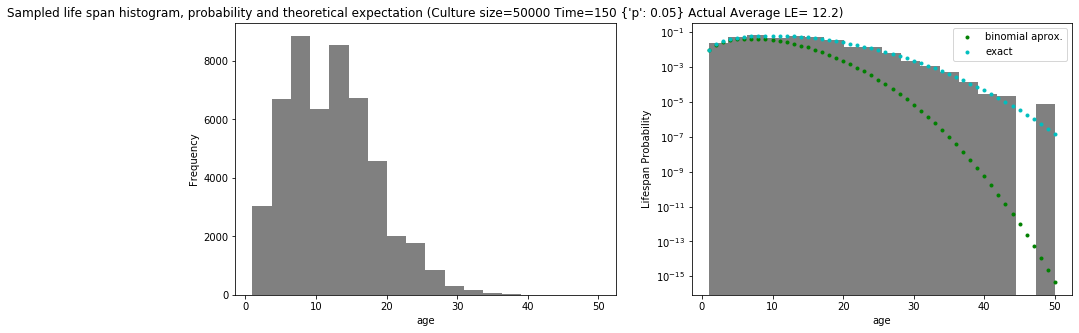

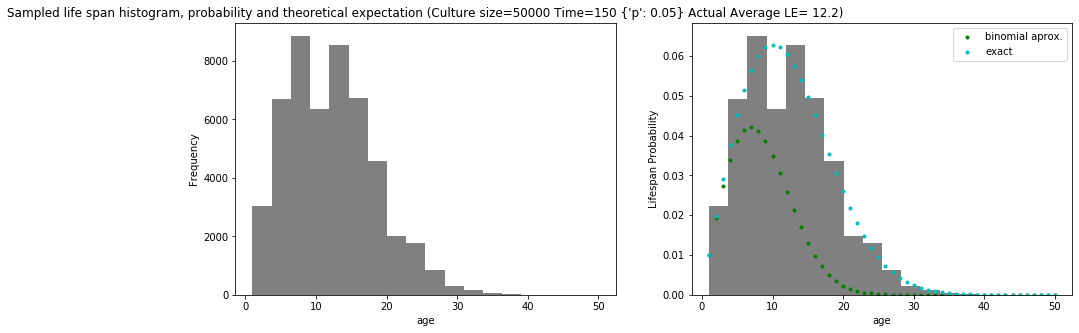

In [34]:
lab2 = BioLab()

lab2.culture = Culture(LivingBeing2,Ncells=50000,p=0.05,r=r)
lab2.runCulture(time=150)
lab2.plotResults()
lab2.plotResults(densityYscale='li')



Now it makes sense and the theoretical model fits perfectly the sampling obtained from the simulation.

Here another, different run.

#DEBUG : createCulture : Being.kargs= {'Alim': 250}
#DEBUG : runCulture time 100
#DEBUG : runCulture min/max ages 1 66


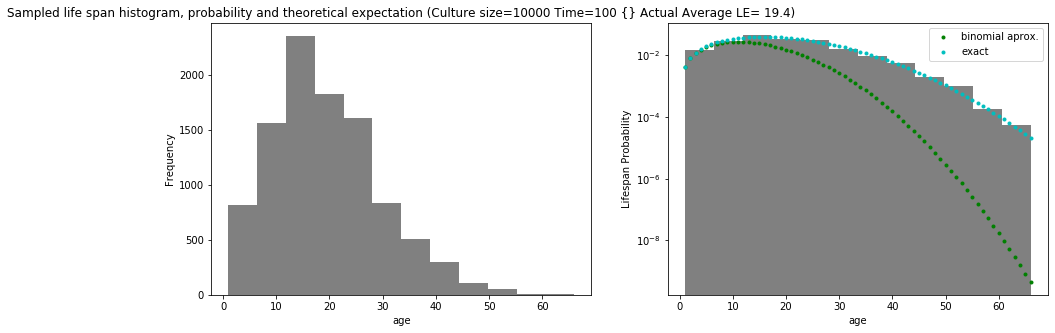

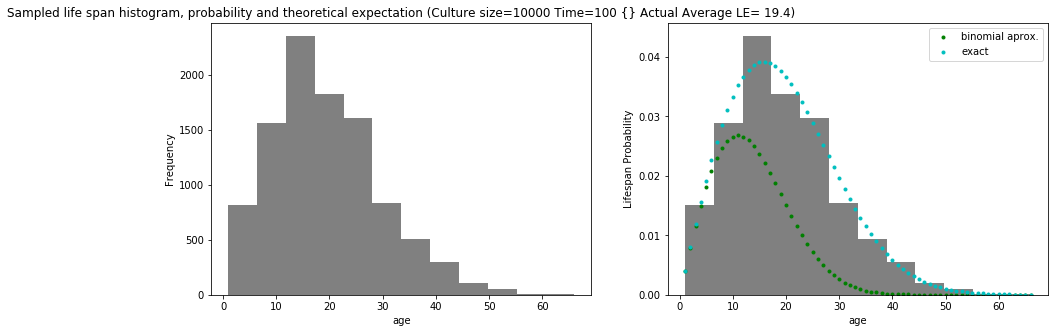

In [24]:
lab2 = BioLab()

lab2.culture = Culture(LivingBeing2,Ncells=10000,Alim=250)
lab2.runCulture(time=100)
lab2.plotResults()
lab2.plotResults(densityYscale='li')


# Life Expectancy

Let's split the probabilistic part altogether from the LivingBeing.

We want to be able to define ad hoc a new risk function, pass it to our livingBeing or our Culture, and perform a simulation and collecting statistics when using that function.

For this sake, we will first create a class that contains all the math functionality around life expectancies we need.

In [25]:
class LifeExpectancy:
        def __init__(self,Alim=100,r=0.1,constant=0,theta=None,**kargs):
                self.Alim=Alim
                self.r=r
                self._c=0
                if constant != 0 : Alim=0
                self.constant=constant
                self._theta=theta
                self.theta_kargs = kargs

        def __repr__(self):
                return self.__str__()
        def __str__(self):
                strm="Probality:; "
                if self.constant != 0 and self.Alim==0 : strm += 'constant p={:.4f} (0,{})'.format(
                                self.constant,self.Alim)
                else:
                        strm +='Alim={}  r={:.5f} '.format(
                                self.Alim,self.r)
                        if type(self._theta) is not type(None):
                            strm += self._theta.__doc__
                        else:
                            strm += '\n p(a)=(1+rA) a/[ A (1+ra) ]'
                return strm

        def theta(self,x,**kargs):
                '''
                # P(D_i | I ¬D_1...¬D_{i-1}) :: Coin toss: 1/0 :: Risk 

                '''
                if type(self._theta) is not type(None): return self._theta(x,**self.theta_kargs)
                
                return (self.constant==0 and x>0 and x<=self.Alim)*( 
                    (1+self.r*self.Alim)*x/( self.Alim*(1+self.r*x) ) 
                )  + (self.constant==0 and x>self.Alim) + (self.constant>0 and x<=self.Alim)*self.constant

        def cf(self,a,**kargs):
                if a<0: return 0
                cf = self.p_lifexp(0)
                if a==0: return cf
                for i in range(1,a+1):
                    cf += self.p_lifexp(i)
                return cf

        def p_lifexp(self,age,**kargs):
                '''
                # P(¬D_1...¬D_{i-1} D_i | I ) :: Probability of D @ i not having D in any of previous i-1 shots 

                # p_lifexp =  theta(age) Prod_i=0^i=age-1 ( 1 - theta(i) )

                '''
                if age<=0 : return 0
                pd=self.theta(age)
                for i in range(1,age):
                    pd *= (1.0 - self.theta(i))
                return pd
        def p_lifexp2(self,age,**kargs):  
                if age==0 : return 0.
                if age>0 and self.theta(age)==1: return 0 #tail where cumm. prob. = 1
                sum=np.log(self.theta(age))
                y=1
                while ( y < age):
                    sum += np.log(1-self.theta(y))
                    y += 1
                return np.exp( sum )

        @property
        def constant(self):
                return self._c
        @constant.setter
        def constant(self,p):
                lm = np.abs(self.Alim)
                if lm == 0 or lm == np.isposinf([lm]) :
                        if p<0 : self._c=0.
                        if p>1 : self._c=1.0
                        self._c = p
                #else:
                #        self._c = 1.0/(lm+1)
                return self._c
        
        def plot(self,densityYscale='log'):
            #Plot functions
            plt.figure(figsize=(16,6))

            if densityYscale != 'log' : densityYscale='linear'
                
            X = np.arange(0,Alim+20)
            
            Yt  = [ self.theta   (x,r=r,Alim=Alim) for x in X]
            #Yr1 = [ self.rho     (x,r=r,Alim=Alim) for x in X]
            #Yr2 = [ self.rho2    (x,r=r,Alim=Alim) for x in X]
            #Yg1 = [ self.gamma   (x,r=r,Alim=Alim) for x in X]
            #Yg2 = [ self.gamma2  (x,r=r,Alim=Alim) for x in X]
            Ys  = [ self.p_lifexp(x,r=r,Alim=Alim) for x in X]
            Yc  = [ self.cf (x,r=r,Alim=Alim,p=p_lifexp) for x in X]



            plt.plot(X,Yt,'r', label='\u03f4(i) ; A='+str(Alim)+' r='+str(self.r))
            #plt.plot(X,Yr1, 'xr',label='\u03c11(i) ')
            #plt.plot(X,Yr2, 'xm',label='\u03c12(i) ')
            #plt.plot(X,Yg1, 'or',label='\u03b31(i) ')
            #plt.plot(X,Yg2, 'om',label='\u03b32(i) ')


            plt.plot(X,Ys, '.c', label='Life exp ')
            plt.plot(X,Yc, '.b', label='cumm Life exp ')


            averageAge = np.sum([ x*p for (x,p) in zip(X,Ys)])


            y1=np.ones(X.size)
            y0=np.zeros(X.size)
            plt.plot(X,y1,color='grey')
            plt.plot(X,y0,color='grey')
            plt.yscale(densityYscale)
            #plt.ylim(0.5,1.01)
            #plt.ylim(0.,.5)
            #plt.ylim(0.,.1)
            #plt.xlim(0.,50)
            plt.legend()
            plt.xlabel('age')
            plt.ylabel('p')
            plt.title('Limited life span: Average life expectancy: {:.1f}'.format(averageAge))
            plt.show()



A `LifeExpectancy` knows how to print itself and is eloquent enought to tell us what function it is using.

Probality:; Alim=100  r=0.05000 
 p(a)=(1+rA) a/[ A (1+ra) ]


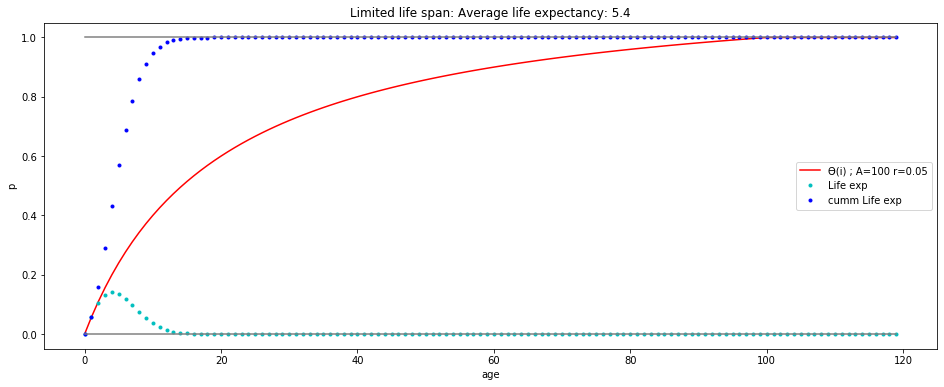

In [26]:
prob = LifeExpectancy(r=0.05)
print(prob)

#print(prob.theta(100), prob.p_lifexp(99))

prob.plot(densityYscale='li')

# LivingBeing 3

Like ver. 2.0 but capable of using the `LifeExpectancy` class for consistent use of arbitrary risk functions.


In [27]:
class LivingBeing3(LivingBeing1):
    '''
    r                                  :: float (0.05)
    Alim                               :: int   (100)
    kargs                              :: dic
    __init__(r=0.05,Alim=100,**kargs)
    '''
    def __init__(self,r=0.0,Alim=100,theta=None,**kargs):
        super().__init__(**kargs)
        self.r=r
        self.Alim=Alim
        self._ver=3.0
        self.kargs=kargs
        
        if type(theta) != type(None): 
            self.theta = theta 
        else:
            self.theta = self._def_theta
            
            
    def _def_theta(self, age): #scalar version
        return (age<=self.Alim)*age*1.0/self.Alim
        #r = self.r
        #Alim = self.Alim
        #age = self.age()
        #return (age>0 and age<=Alim)*( (1.0+r*Alim)/( Alim * (1.0+r*age) * (1.0+r*(age-1)) ) )



## Examples

Watch a few more possible risk functions $\theta(age)$: 

* $\arctan(age)$
* $\tanh(age)$
* and our example 3 above

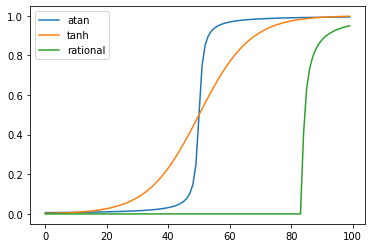

In [28]:
import math
lm=100
X=range(lm)
plt.plot(X,[0.5+math.atan(x-lm/2)/math.pi for x in X],label='atan')
plt.plot(X,[0.5*(1+math.tanh(6*(x-lm/2)/lm)) for x in X],label='tanh')

plt.plot(X,[(lambda x: (x>0)*(1+lm)*x/(lm*(1+x)))(x-lm/1.2) for x in X],label='rational')
plt.legend()

### Example 2 
Using the new class `LifeExpectancy` together with `LivingBeing3` we can use any external functional as our risk function that we want.

In [29]:
def le_th(x,**kargs):
    '''
    0.5*(1+math.tanh(10*(x-lm/2)/lm))
    '''
    return 0.5*(1+math.tanh(10*(x-lm/1.1)/lm))

This model makes it easier to get an average life expectancy closer to the age limit

Probality:; Alim=100  r=0.10000 
    0.5*(1+math.tanh(10*(x-lm/2)/lm))
    


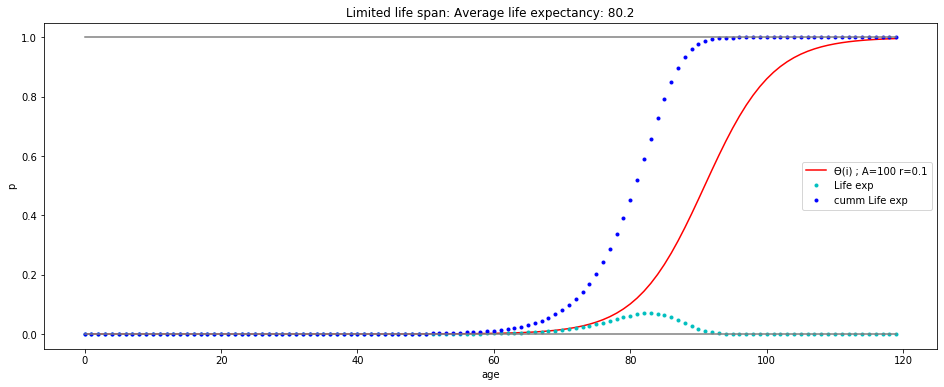

In [30]:
risk = LifeExpectancy(theta=le_th,lm=100)
print(risk)
risk.plot(densityYscale='l')

Now passing this new risk function when instantiating a new `Culture` it will be assigned as the risk factor for the `LivinBeing3` the culture consists of.

#DEBUG : createCulture : Being.kargs= {'Alim': 100, 'theta': <bound method LifeExpectancy.theta of Probality:; Alim=100  r=0.10000 
    0.5*(1+math.tanh(10*(x-lm/2)/lm))
    >, 'r': 0}
#DEBUG : runCulture time 150
#DEBUG : runCulture min/max ages 23 98


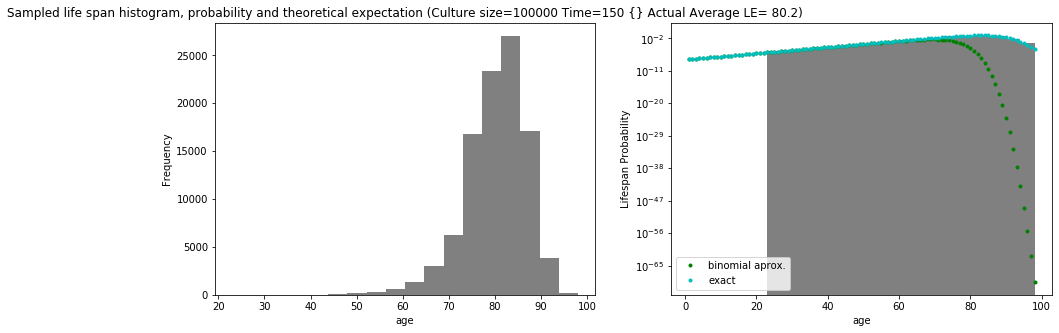

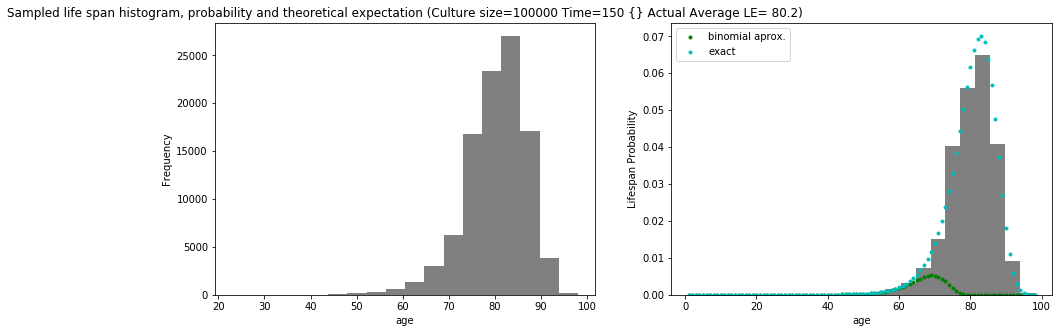

In [31]:
lab3 = BioLab()

lab3.culture = Culture(LivingBeing3,Ncells=100000,Alim=100,theta=risk.theta, r=0)
lab3.runCulture(time=150)
lab3.plotResults()
lab3.plotResults(densityYscale='li')


#### Average life expectancy at a given age, aka, expected future lifetime

Let's calculate the following:

> At any given age $i$, how many more years do we expect a cell to live on average?


At any given year $i$, consider all cells that died then or at a later year $a$. For each of them,
the value $a-i$ gives the amount of years lived beyond generation $i$. Add all those values and divide by the
number of those cells (the ones that didn't die before year $i$), $N_i$. This will give us the average future
lifetime at age $i$.

If instead of dividing by $N_i$ we divide by $N$, the total number of cells, we will get an approximation that is easy to calculate numerically.

For a detailed discussion about this, see the section _Technical details_ in the Appendix.

In [344]:
Time=100
N=100000
L=np.zeros(Time)
eps=np.zeros(Time)
nn =np.zeros(Time)
for a in lab3.culture.ages:
    for i in range(a):
        L[i] += a-i
        #eps[i] += (a-i)
        nn[i] += 1
    
eps = [ e/n if n!=0 else 0 for (e,n) in zip(L,nn)]
L *= 1/N

In [350]:
np.sum(nn),nn[:3],nn[80:80+3]

(8022880.0,
 array([100000., 100000., 100000.]),
 array([54793., 48082., 41221.]))

The average future lifetime at ages 0, 1 and 2 are:
[80.2288 79.2288 78.2288]


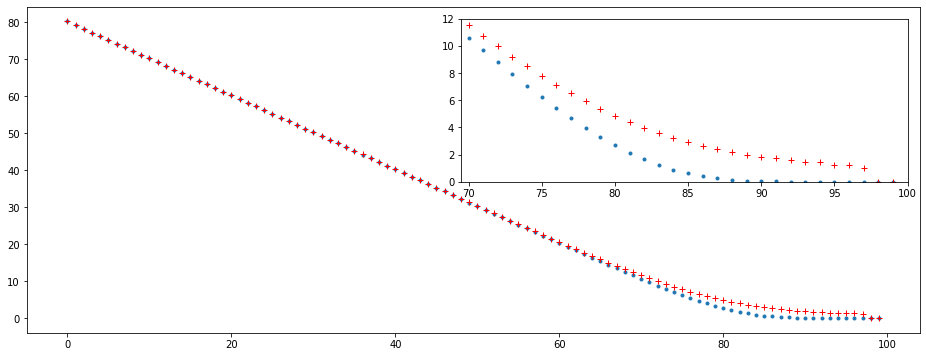

In [357]:
print('The average future lifetime at ages 0, 1 and 2 are:\n'+str(L[:3]))

from mpl_toolkits.axes_grid.inset_locator import inset_axes

fig , ax = plt.subplots(figsize=(16,6))


X=range(Time)
plt.plot(X,L,'.')
plt.plot(X,eps,'+r')
#plt.ylim(0,5)
#plt.xlim(80,100)

inset1_axes = inset_axes(ax, 
                    width="50%", # width = 30% of parent_bbox
                    height="50%", # height =1 : 1 inch
                    borderpad=1.2,
                    loc=1)
plt.plot(X,L,'.')
plt.plot(X,eps,'+r')
plt.xlim(69.5,Time)
plt.ylim(0,12)


plt.show()

In [286]:
print(L[-20:-17])

[2.66983 2.1219  1.64108]


### Example 3 
In this example the risk factor $\theta_i$ is almost immediately $1$ but for very small values of `r`.

In the following, we will compare the values $r=0.01,\,0.75$.

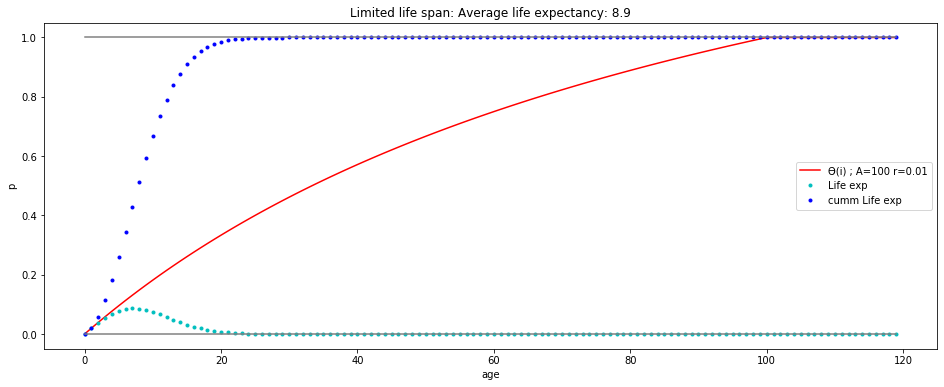

#DEBUG : createCulture : Being.kargs= {'Alim': 100, 'theta': <bound method LifeExpectancy.theta of Probality:; Alim=100  r=0.01000 
 p(a)=(1+rA) a/[ A (1+ra) ]>, 'r': 0.01}
#DEBUG : runCulture time 20
#DEBUG : runCulture min/max ages 1 20


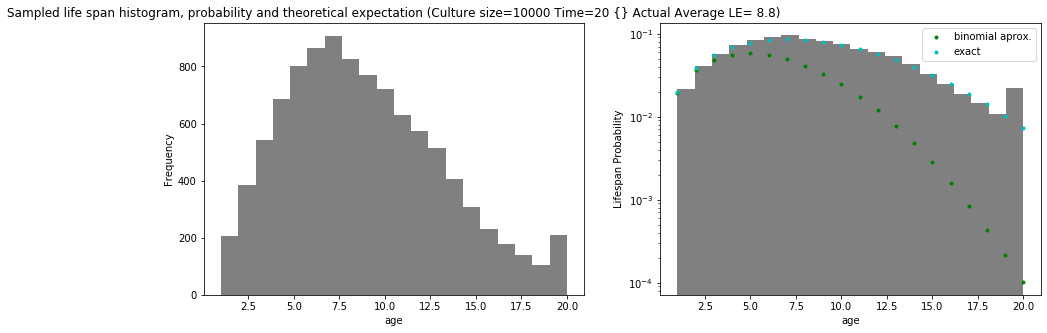

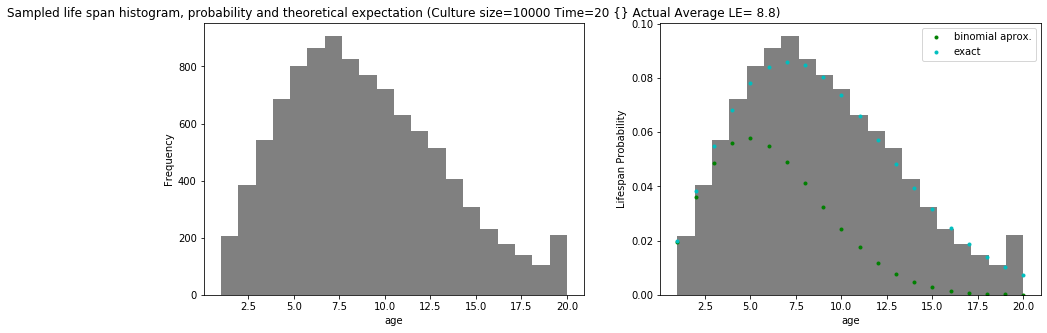

In [32]:
lab4 = BioLab()

risk = LifeExpectancy(Alim=100,r=0.01)
risk.plot(densityYscale='l')

lab4.culture = Culture(LivingBeing3,Ncells=10000,Alim=100,theta=risk.theta, r=risk.r)
lab4.runCulture(time=20)
lab4.plotResults(binsize=1)
lab4.plotResults(densityYscale='l',binsize=1)


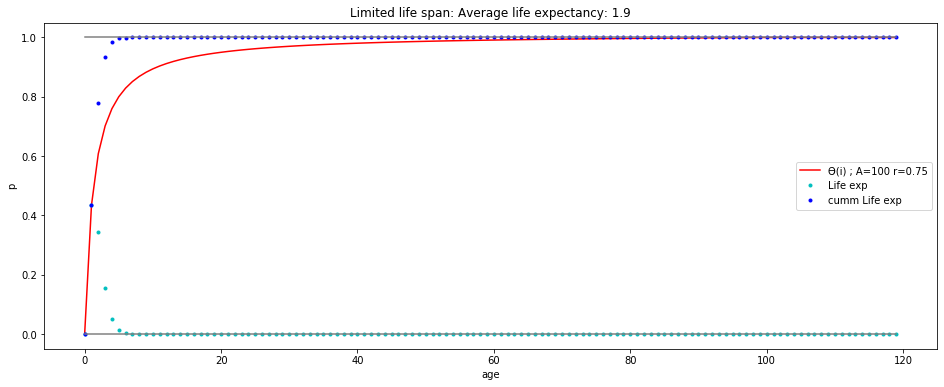

#DEBUG : createCulture : Being.kargs= {'Alim': 100, 'theta': <bound method LifeExpectancy.theta of Probality:; Alim=100  r=0.75000 
 p(a)=(1+rA) a/[ A (1+ra) ]>, 'r': 0.75}
#DEBUG : runCulture time 10
#DEBUG : runCulture min/max ages 1 7


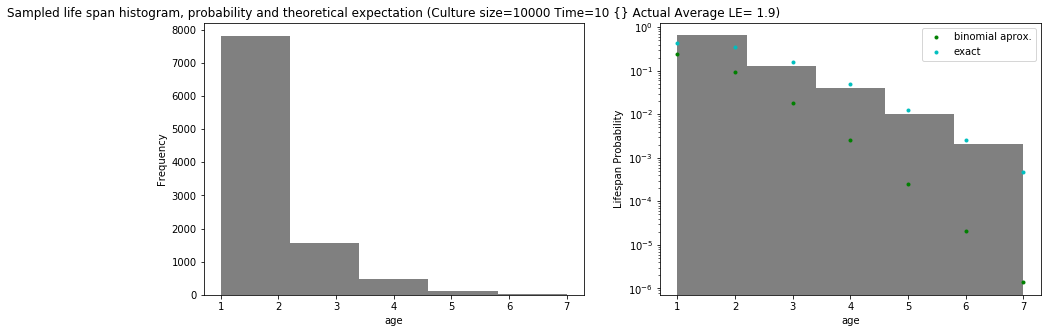

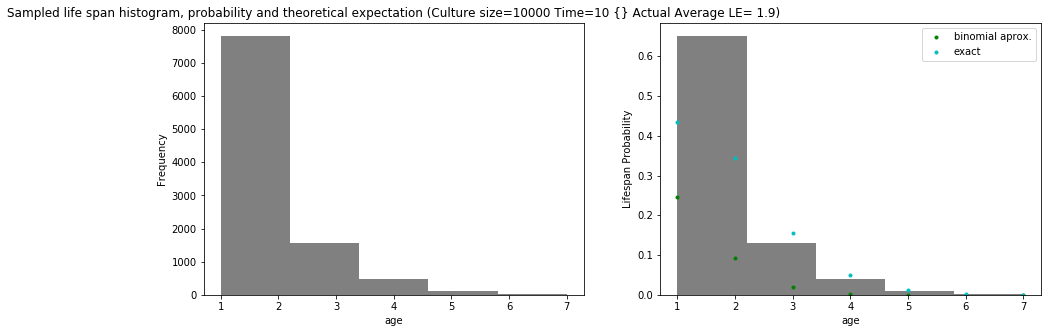

In [33]:
risk = LifeExpectancy(Alim=100,r=0.75)
risk.plot(densityYscale='li')

lab4.culture = Culture(LivingBeing3,Ncells=10000,Alim=100,theta=risk.theta, r=risk.r)
lab4.runCulture(time=10)
lab4.plotResults(binsize=2)
lab4.plotResults(densityYscale='l',binsize=2)

# Epilogue

OOP involves more, a priori, unnecessary code. We could have done all defiing a few functions and a couple of nested loops. That's true. 

The value of OOP lies, however, in the important feature of **code reuse**. If we want to explore different risk functions, different plotting options, or different type of random experiments, we can reuse the same code above of

* `LivingBeing3`
* `LifeExpectancy`
* `Culture`
* `BioLab`

with minor modifications. Furthermore, these modifications might be done in a way to further augment the applicability of the code to new cases. 

Not all is fixed nor explored in the above code. Some details would require some polishing, like automatically printing the right `kargs` parameters passed -not always does that work above.

You can explore this and other options to improve and extend the present example of OOP.



## Idea(s)

1. The simples you can try: come up with risk factor that's a 4th degree polynomial which shows some ininitial rapid increase at early ages, then it reduces and at later ages it picks up again up to 1.
1. Each time a cell reproduces,  add it to the culture. 
   1. Add a finite number of possible offsprings. 
   2. How does the population evolve? 
   3. Do they survive for ever? go extinct? 
   4. What is the average life expectancy? 
   5. What risk functions make more sense to use?
2. Sweep evolution: Instead of evolving each cell to death till we focus on the next one ("depth-first"/series/linear), let evolve the whole culture one step at a time (a sweep), then the next sweep, etc.
   1. Does the results change?
3. More complex scenarios can be thought of by allowing cells to interact between each other:
   1. Assign to each pair an arbitrary distance. Make densely populated areas more/less risky.
4. Introduce some food source that varies (periodically or depleting) with time, affecting thus the risk factor.
5. **Markov chain** (see appendix below): Add a kind of memory variable to the risk rate. The simplest case could be a variable that contains a value last uptdated on the previous generation. 
5. Combine some of the previous ideas

# Appendix

## 4th Degree polynomial risk with multimodal Life Expectancy

Let's find first a convenient polynomial by trial and error.

In [35]:
def pol4(x,a=[1,-1,1,1,-1]):
    x2=x*x
    X=[1,x,x2,x2*x,x2*x2]
    return np.sum([a*x for (a,x) in zip(a,X)])

11.776 11.776


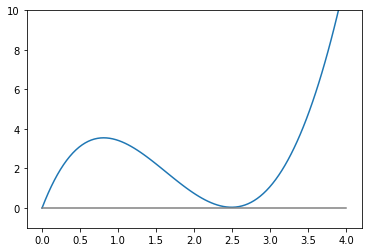

In [185]:
a = [0,10,-8.5,2,-.079]
#a = [ 0, 5 , -53/8, 7/3, -1/4]
L=4
Li=0
Lf=L
X=np.linspace(-Li,Lf,100)

Y =[ pol4(x,a) for x in X]
plt.plot(X,Y)
plt.plot(X,np.zeros(len(Y)),color='grey')
plt.ylim(-1,10)
print(max(Y),pol4(4,a))


# pol4_d1 = (x-1/2) (x-5/2) (x-4) = -1/4 (2x-1) (2x-5) (x-4) = 
#         = -1/4 [ -20 5x+8x+40x -2xx-10xx-16xx-4xxx] = -1/4 [-20 +53x -28xx +4xxx]
# pol4 = - [ -5(x-a) +53/4(xx/2 - aa/2) -7(xxx/3 - aaa/3) +(xxxx/4-aaaa/4) ]
# pol4 = +5x -53/8xx +7/3xxx -xxxx/4

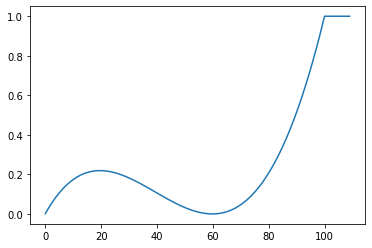

In [150]:

def myRisk(x,Alim=100):
    '''
    4th degree polynomial p(x) w/ coefficients
         0  1   2 3  4
    a = [0,15,-13,3,-.05]
    
    Horizontally dilated by 4/Alim
    Vertically compressed by a factor p(4) 
    
    It's = 1 after Alim
    '''
    a = [0,15,-13,3,-.079]
    yscale=pol4(4,a)
    return (x>0 and x<=Alim)*(pol4(4*x/Alim,a)/yscale ) + (x>Alim)*1.0

Alim=100
X=range(0,Alim+10)
Y = [ myRisk(x,Alim) for x in X]

plt.plot(X,Y)


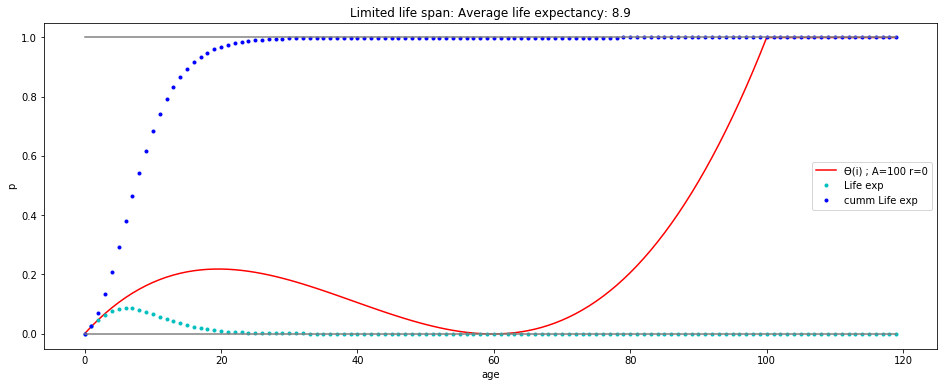

Probality:; Alim=100  r=0.00000 
    4th degree polynomial p(x) w/ coefficients
         0  1   2 3  4
    a = [0,15,-13,3,-.05]
    
    Horizontally dilated by 4/Alim
    Vertically compressed by a factor p(4) 
    
    It's = 1 after Alim
    

In [151]:
myLe = LifeExpectancy(r=0,theta=myRisk,Alim=100)
myLe.plot(densityYscale='li')
myLe

#DEBUG : createCulture : Being.kargs= {'Alim': 100, 'theta': <bound method LifeExpectancy.theta of Probality:; Alim=100  r=0.00000 
    4th degree polynomial p(x) w/ coefficients
         0  1   2 3  4
    a = [0,15,-13,3,-.05]
    
    Horizontally dilated by 4/Alim
    Vertically compressed by a factor p(4) 
    
    It's = 1 after Alim
    >}
#DEBUG : runCulture time 100
#DEBUG : runCulture min/max ages 1 85


/Users/msantos/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in log


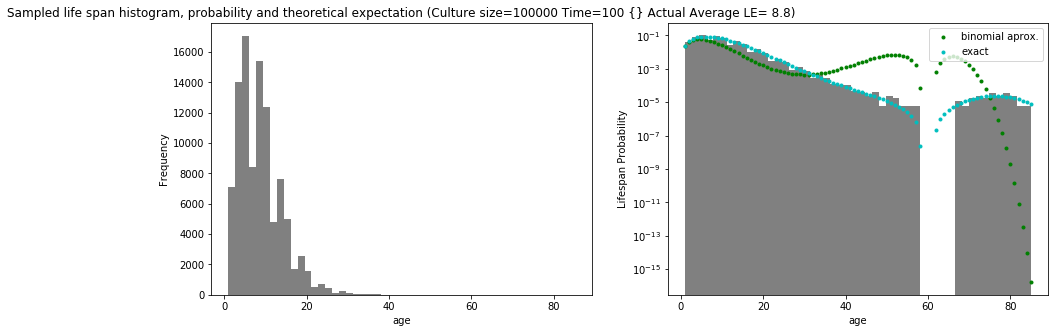

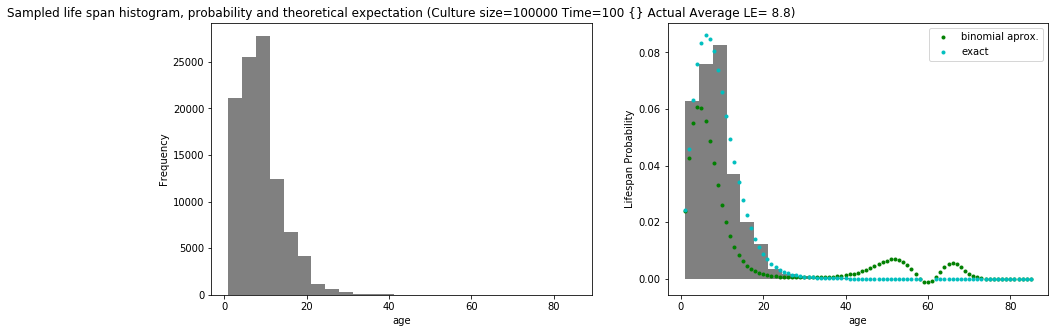

In [153]:
myLab = BioLab()

myLab.culture = Culture(LivingBeing3,Ncells=100000,Alim=100,theta=myLe.theta)
myLab.runCulture(time=100)
myLab.plotResults(binsize=2)
myLab.plotResults(densityYscale='l',binsize=4)

## Markov chain, or how to simulate cells that hibernate (or go zombie)

### Non-Markovian aka Time-correlated evolution

#### Our current simulations are "Non-Markovian"
Currently, the risk of dying at a given generation $i$ depends (on a trivial way, though) on all previous generations!


This may sound counterintuitive. However, that's how we are simulating the evolution of these cells: if the cell dies at generation $i$, then we stop its evolution. 


To fix ideas, say we allow an evolution for max 100 generations and a given cell dies at generation 50. This effectively means that it cannot die at generation 51 or later. Hence, $\theta_j=0\quad\mbox{for}\,50<j$. 


And the other way around, if the cells dies at generation 60 that has only been possible because it didn't die at any previous generations.


Whence the notation we used above, namely $\theta_i\,=\,P(D_i\,|\,I\,\urcorner D_1\cdots\urcorner D_{i-1})$.

If $\theta$ represents the risk of dying as we understand the concept of death, **_this cannot be changed_**: death depends on having lived all previous generations!


#### Going into hybernation
How can we change this state of affairs? 


Instead of describing the risk of dying, $\theta$ _could be describing the chance of going into hibernation and say $1-\theta$ that of awakening from it_. 

Another option is saying $\theta$ is the risk of becoming a zombie. Evolution -as a zombie- would then go on, with a chance of $1-\theta$ to come back to normal life.


Therefore, a way to implement a risk that only depends on a finite number of previous states is:

1. Interpreting $\theta$ not as the chance of dying, but that of something else that allows coming back and forth between two different possibilities.
2. and then, one way could be by introducing a property that changes at each generation. Then make the risk factor $\theta_i$ also **_depend on some previous values of that property_**. 


To fix ideas: Let's call the property `Health`. Store it as an array as long as the max number of generations we will let the cell evolve.


Then make the risk factor depend on say the last five values of the `Health` variable:
$$\theta_i \,=\,f(Health[i+1-5:i+1])\,=\,f(Health[i-4:i+1])$$
Of course, this only applies to generation $4$ and beyond. The first 3 generations would only depend on the previous ones.

Currently, what we have is tantamount to
$$\theta_i \,=\,f(Health[:i+1])$$


Remember: $i$ is the current generation. Arrays of length $L$ have their indices run from $0\,\mbox{to},i-1$. You may check yourself that

* for generation $i=0$ the above relation would make $\theta$ depend only on the `Health` value at that same generation, as expected.
* for generation $i=1$, it would depend on the first $2$ `Health` values, indices $0$ and $1$, also as expected.
* and so on.

### Markovian evolution
This is characterized by making the **risk factor depend only on the current and last state of the `Health` variable**.

$$\theta_i \,=\,f(Health[i+1-2:i+1])\,=\,f(Health[i-1:i+1])$$

which again only holds for $i\geq 1$ as generation $0$ has no previous generation.


## Technical details

### Single time and 1-year decease probabilities 

We can define 

1. $\gamma_i\,\equiv\,Prob(D_i|I)$, the prob of dying at i irrespectively of what happened at any previous time. Notice that what we really mean, given the experiment, is the chance to _report dead at age i, irrespectively of what was reported at any previous time_. Of course, in our case, the only posibility to report a decease time of $i$ is if the cell didn't die at any previous time. Therefore, in our case it is $$\gamma_i\,=\,\Phi_i$$. 
     Formally, the argument can be shown as follows. We will illustrate it for a specific case $i=3$
     $$P(D_3|I)\,=\,P(D_3(D_2+\urcorner D_2)(D_1+\urcorner D_1)|I)\,=\,P(D_3\urcorner D_2\urcorner D_1|I)\,=\,\Phi_3$$
     as any of the other three combinations containing either $D_2$ or $D_1$ will be zero.
     
     It will be useful to consider $P(\urcorner D_3|I)$. Now some of those other combinations do not vanish:
     $$P(\urcorner D_3(D_2+\urcorner D_2)(D_1+\urcorner D_1)|I)\,=\,P(\urcorner D_3 D_2\urcorner D_1\,+\,\urcorner D_3 \urcorner D_2 D_1\,+\,\urcorner D_3 \urcorner D_2\urcorner D_1)|I)\,=$$
     $$=\,\theta_1\,+\,\theta_2(1-\theta_1)\,+\,(1-\theta_3)(1-\theta_2)(1-\theta_1).$$
     It is straightforward to see that the first result is the complement of the latter.

2. $\rho_i\,=\,Prob(D_i|I\urcorner D_{i-1})$, the prob of being dead at i if it wasn't at i-1 [$\dagger$]. Put in other terms, this is the _1 year death probability_: At any given age $i$ what is the chance to die next year. Applying Bayes theorem. Consider first the case of $Prob(D_4|I\urcorner D_{3})$
     $$P(D_4|I\urcorner D_{3})\,=\,P(D_4|I\urcorner D_{3}(D_{2}+\urcorner D_{2})(D_1+\urcorner D_{1}))\,=$$$$=\,P(D_4|I\urcorner D_{3}\urcorner D_{2}\urcorner D_{1}+\urcorner D_3 D_2\urcorner D_1+\urcorner D_{3}\urcorner D_{2}D_{1}+\urcorner D_3D_2D_1))\,=$$
     $$=\,P(D_4|I\urcorner D_{3}\urcorner D_{2}\urcorner D_{1}+\urcorner D_3 D_2\urcorner D_1+\urcorner D_{3}\urcorner D_{2} D_{1})\,=$$
     $$=\,\frac{P(D_4|I\urcorner D_{3}\urcorner D_{2}\urcorner D_{1})P(\urcorner D_3|I\urcorner D_{2}\urcorner D_{1})P(\urcorner D_2|I\urcorner D_{1})P(\urcorner D_1|I)}{P(D_1|I),+\,P(D_2\urcorner D_1|I)\,+\,P(\urcorner D_3\urcorner D_2\urcorner D_1)}$$
     where we have used the fact that $P(\urcorner D_2 D_1|I)\,=\,P(D_1|I)$ and, similarly, $P(\urcorner D_3 D_2 \urcorner D_1|I)\,=\,P(D_2 \urcorner D_1|I)$.
     From our discussion about $\gamma_i$, we can see that the denominator is simply $P(\urcorner D_3|I)\,=\,1\,-\,P(D_3|I)\,=\,1\,-\,\Phi_3$.
     For an arbitrary generation $i$, this leads to
     $$\rho_i\,=\,\frac{\theta_i\,\Pi_{k=0}^{k=i-1}(1-\theta_k)}{\sum_{n=1}^{n=i-2}\theta_n\Pi_{j=1}^{j=n-1}(1-\theta_j)\,+\,\Pi_{k=0}^{k=i-1}(1-\theta_k)}\,=\,\frac{\Phi_i}{1\,-\,\Phi_{i-1}}$$
     

with the following properties 

* $\gamma_0\,=\,\rho_0\,=\,\theta_0\,=\,0$
* $\gamma_1\,=\,\rho_1\,=\,\theta_1$



[^$\dagger$]: Formerly, we (wrongly?) identified $\rho\,\equiv\,\theta_i\,-\,\theta_{i-1}\,$

#### Relation $\rho$ and $\gamma$ 
Consider two consecutive generations $i-1$ and $i$. By the product rule
$$Prob(D_i|I\urcorner D_{i-1})\,Prob(\urcorner D_{i-1}|I)\,=\,Prob(\urcorner D_{i-1}|ID_i)\,Prob(D_i|I)$$
From the way we are performing this experiment, it is $Prob(\urcorner D_{i-1}|ID_i)=1$.

Hence, by the rule of excluded middle this can be written as 
$$Prob(D_i|I\urcorner D_{i-1})\,\left[1\,-\,Prob(D_{i-1}|I)\right]\,=\,Prob(D_i|I)$$
or
$$\rho_i\,(1-\gamma_{i-1})\,=\,\gamma_i$$
Taking into account that $\gamma_0=0$, this recurrence relations leads to the following series
$$\gamma_i\,=\rho_i\,-\,\rho_i\rho_{i-1}\,+\,\rho_i\rho_{i-1}\gamma_{i-2}\,=\,\\\rho_i\,-\,\rho_i\rho_{i-1}\,+\,\rho_i\rho_{i-1}\rho_{i-2}\,-\,\rho_i\rho_{i-1}\rho_{i-2}\rho_{i-3}\,+\,\cdots\,+\,(-1)^{i-1}\rho_i\rho_{i-1}\cdots\rho_2\rho_1$$

Using summation and repeated product symbols, we can write this in short as
$$\gamma_i\,=\,\sum_{n=0}^{i-1}\,\Pi_{k=i-n}^{k=i}\,\rho_k$$

Let's fix ${\cal A}=100$.

Wacht the corresponding plots for risk function of example 1.



In [323]:
import matplotlib.pyplot as plt

import numpy as np

#p = (lambda x,r: (1+r*Alim)/(Alim*(1+r*x)**2) )
#p = (lambda x,r: ( (1+r*Alim)/( Alim*(1+r*x)*(1+r*(x-1)) ) ) )
def theta(i,r,Alim):
    return (i>0 and i<=Alim)*i*1.0/Alim
    #return (x>0 and x<=Alim)*( (1+r*Alim)/( Alim*(1+r*x)*(1+r*(x-1)) ) )
def theta_v(x,r,Alim):
    return x*1.0/Alim
    #return ( (1+r*Alim)/( Alim*(1+r*x)*(1+r*(x-1)) ) )

def p_lifexp(age,r,Alim):  #Life expectancy prob. Scalar: p_lifexp =  p(age) Prod_i=0^i=age-1 ( 1 - p(i) )
    if age==0 or theta(age,r,Alim)==0 : return 0
    sum=np.log(theta(age,r,Alim)) 
    y=1
    while ( y < age):
        sum += np.log(1-theta(y,r,Alim))
        y += 1
    return np.exp( sum )

def p_lifexp_v(ages,r,Alim):
    return [p_lifexp(age,r,Alim) for age in ages ]

def cf(age,r,Alim,p):
    sum =0
    for i in range(age+1):
        sum += p(i,r,Alim)
    return sum

def rho(i,r,Alim):
    return p_lifexp(i,r,Alim)/(1-p_lifexp(i-1,r,Alim))

    #return (i>0 and i<=Alim)*1.0/Alim
    #if m==0: return 0
    ##return (m<=Alim)*p(m,r) + f(m-1,r) 
    #return p(m,r,Alim) + f(m-1,r,Alim) 

def gamma(i,r,Alim):
    s=0
    p=1
    for k in range(i,0,-1):
        p *= rho(k,i,Alim)
        s += p*(-1)**(i-k)
    return s

#max age possible
Alim=100
X = np.arange(0,Alim+2)

#Example 1
r=0.05
Yt  = [ theta   (x,r=r,Alim=Alim) for x in X]
Yr1 = [ rho     (x,r=r,Alim=Alim) for x in X]
Yg1 = [ gamma   (x,r=r,Alim=Alim) for x in X]
Ys  = [ p_lifexp(x,r=r,Alim=Alim) for x in X]
Yrs = [ rr/s-1 if s!=0 else 0  for (rr,s) in list(zip(Yr1,Ys)) ]
Ygs = [ gg/s if s!=0 else 0  for (gg,s) in list(zip(Yg1,Ys)) ]
Yc  = [ cf (x,r=r,Alim=Alim,p=p_lifexp) for x in X]
averageAge = np.sum([ x*p for (x,p) in zip(X,Ys)])




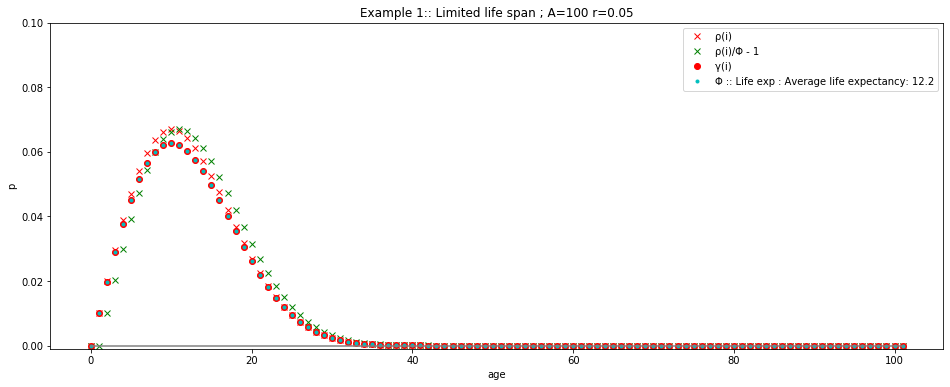

In [225]:
#Plot functions
plt.figure(figsize=(16,6))



#plt.plot(X,Yt,'r', label='\u03f4(i) ; A='+str(Alim)+' r='+str(r))
plt.plot(X,Yr1, 'xr',label='\u03c1(i) ')
plt.plot(X,Yrs, 'xg',label='\u03c1(i)/\u03a6 - 1')
plt.plot(X,Yg1, 'or',label='\u03b3(i) ')
#plt.plot(X,Yg2, 'om',label='\u03b32(i) ')


#plt.plot(X,Prob(X,r), '.r')
plt.plot(X,Ys, '.c', label='\u03a6 :: Life exp : Average life expectancy: {:.1f}'.format(averageAge))
#plt.plot(X,Yc, '.b', label='cumm Life exp ')

y1=np.ones(X.size)
y0=np.zeros(X.size)
plt.plot(X,y1,color='grey')
plt.plot(X,y0,color='grey')
#plt.yscale('log')
#plt.ylim(0.5,1.01)
#plt.ylim(0.,.5)
plt.ylim(-0.001,.1)
#plt.xlim(0.,50)
plt.legend()
plt.xlabel('age')
plt.ylabel('p')
plt.title('Example 1:: Limited life span ; A='+str(Alim)+' r='+str(r))
plt.show()



Notice that 
$$q_i\,\equiv\,\frac{\rho_i}{\Phi_i}-1\,=\,\frac{1}{1-\Phi_{i-1}}-1\,=\,\frac{\Phi_{i-1}}{1-\Phi_{i-1}}$$

Hence, _**the ratio $q_i$ represents the odds of dying at the previous year $i-1$**_. That explains why it peaks one year later than $\Phi_i$ does, as we can see in the plot above.


### Expected Future Lifetime

This answers the questions: 

> What's the probability to live up to age $i$ and die exactly $k$ years later?

Clearly, this is $P(D_{i+k}\urcorner D_{i}\cdots\urcorner D_1|I)$

But the only possible _future path_ for the cell do die exactly $k$ years later is that it doesn't die inbetween. Hence,
$$P(D_{i+k}\urcorner D_{i}\cdots\urcorner D_1|I)\,=\,P(D_{i+k}\urcorner D_{i+k-1}\cdots\urcorner D_1|I)\,=\,\Phi_{i+k}$$

The **_yearly expected future lifetime_**, $e_i$, is the average amount of years a cell of age i will still survive:
$$e_i\,=\,\sum_{k=0}^{k=A-i}k\,\Phi_{i+k}$$

What we called before the _average life expectancy_ is simply the expected future lifetime at birth, i.e., $e_0$.

We can rewrite the expected future lifetime as
$$e_i\,=\,\sum_{n=i}^{n=A}(n-i)\,\Phi_n\,=\,\sum_{n=i}^{n=A}n\,\Phi_n\,-\,i$$
Now, values of $A$ and $i$ such that $A\gg i$, the first term is approximately 
$\sum_{n=i}^{n=A}n\,\Phi_n\,\approx\,\sum_{n=0}^{n=A}n\,\Phi_n\,=\,e_0$, i.e.,
$$e_i\,\approx\,e_0\,-\,i$$
and thus $e_i$ decays linearly with $i$ (see figure below). 

For values of $i$ closer to $A$ that approximation is no longer valid. From the plot we can see that the decay slows down asymptotically.


#### Extra material 

##### 1

A related question is

> If the cell survived up to age $i$, what's the probability of dying exactly $k$ years later?

This is $P(D_{i+k}|I\urcorner D_{i}\cdots\urcorner D_1)$. Notice that $P(\urcorner D_{i}\cdots\urcorner D_1|I)=\sum_{k=i+1}^{A}\Phi_k\,=\,1\,-\,\sum_{k=1}^{k=i}\Phi_k$

For analogous reasons, this is
$$P(D_{i+k}|I\urcorner D_{i}\cdots\urcorner D_1)\,=\,\frac{\Phi_{i+k}}{\sum_{n=i+1}^{A}\Phi_n}$$

Let's denote by $\epsilon_i$ the average :
$$\epsilon_i\,=\,\sum_{k=1}^{k=A-i}k\,\frac{\Phi_{i+k}}{\sum_{n=i+1}^{A}\Phi_n}$$


##### 2

And finally, a third related question:

> At any given age $i$, what's the probability of dying exactly $k$ years later?

When we say here _at any given age_, we mean **_not having reported dead at that age $i$_**.

Thus this is $P(D_{i+k}|I\urcorner D_{i})$ in this case.

Let's derive the general expression in detail. We will use the same trick.
$$P(D_{i+k}|I\urcorner D_{i})\,=\,P(D_{i+k}|I\urcorner D_{i}\,\Pi_{n=1}^{n=i-1}(D_n+\urcorner D_n))\, .$$

The condition can be rewritten as 
$$\urcorner D_{i}\,\Pi_{n=1}^{n=i-1}(D_n+\urcorner D_n)\,=\,\urcorner D_i\left\{\sum_{n=1}^{i-1}D_n\Pi_{m=1,\,m\neq n}^{m=i-1}\urcorner D_m\,+\,\urcorner D_1\cdots\urcorner D_{i-1}\right\}$$
Hence the condition decomposes as the disjunction of mutually excluding events. We can thus apply Bayes theorem.
$$P(D_{i+k}|I\urcorner D_{i})\,=\,\frac{P(D_{i+k}|I\urcorner D_1\cdots\urcorner D_{i})\,P(\urcorner D_{i}\cdots\urcorner D_1|I)}{\sum_{n=1}^{i-1}P(\urcorner D_i D_n\Pi_{m=1,\,m\neq n}^{m=i-1}\urcorner D_m|I)\,+\,P(\urcorner D_{i}\cdots\urcorner D_1|I)}$$

Notice that $P(\urcorner D_i D_n\Pi_{m=1,\,m\neq n}^{m=i-1}\urcorner D_m|I)\,=\,P(D_n|I)\,=\,\Phi_n$, as discussed before. Furthermore, the probability in the numerator has only one possible path for being different from zero, namely, the path where the cell exactly dies at $i+k$. 

Therefore it is,
$$P(D_{i+k}|I\urcorner D_{i})\,=\,\frac{\Phi_{i+k}}{1\,-\,\Phi_i}$$

Let's denote by $\beta_i$ the average :
$$\beta_i\,=\,\sum_{k=1}^{k=A-i}k\,\frac{\Phi_{i+k}}{1\,-\,\Phi_i}$$

In [331]:
def e(i,r,Alim):
    s=0
    for k in range(Alim-i+1):
        s += k*p_lifexp(i+k,r,Alim)
    return s

Ye = [ e(x,r,Alim) for x in X]


def eps(i,r,Alim):
    s=0
    for k in range(1,Alim-i+1):
        s += k*p_lifexp(i+k,r,Alim)/(1.-cf(i,r,Alim,p=p_lifexp))
    return s

Yeps = [ eps(x,r,Alim) for x in X]

Yepse = [ x/y if y!=0 else 0 for (x,y) in zip(Yeps,Ye)]

def beta(i,r,Alim):
    s=0
    for k in range(1,Alim-i+1):
        s += k*p_lifexp(i+k,r,Alim)/(1.-p_lifexp(i,r,Alim))
        #s += k*p_lifexp(i+k,r,Alim)/(1.-p_lifexp(i,r,Alim)+cf (i-1,r=r,Alim=Alim,p=p_lifexp))
    return s

Ybeta  = [ beta(x,r,Alim) for x in X]

#Yebeta = [ y/x if x!=0 else 0 for (x,y) in zip(Ybeta,Ye)]
Ybetae = [ x/y if y!=0 else 0 for (x,y) in zip(Ybeta,Ye)]




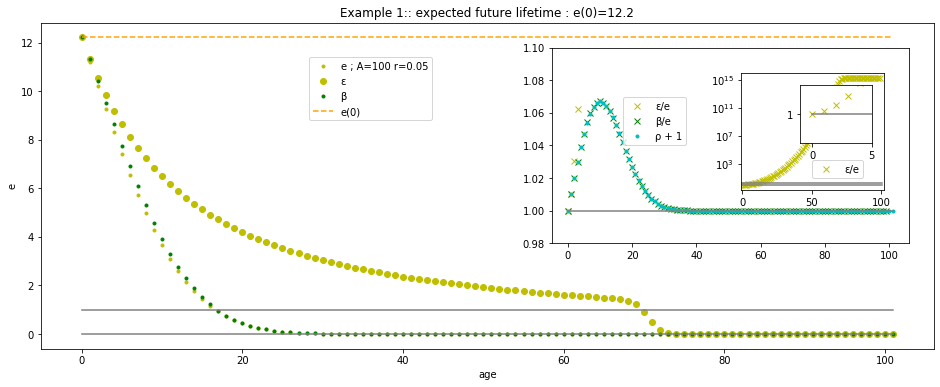

In [332]:
#Plot functions
from mpl_toolkits.axes_grid.inset_locator import inset_axes

fig , ax = plt.subplots(figsize=(16,6))

plt.plot(X,Ye,'.y',label='e ; A='+str(Alim)+' r='+str(r))
plt.plot(X,Yeps,'oy',label='\u03b5 ')
plt.plot(X,Ybeta,'.g',label='\u03b2 ')


'''
plt.plot(X,Yt,'r', label='\u03f4(i) ; A='+str(Alim)+' r='+str(r))
plt.plot(X,Yr1, 'xr',label='\u03c1(i) ')
plt.plot(X,Yrs, 'xg',label='\u03c1(i)/\u03a6 - 1')
plt.plot(X,Yg1, 'or',label='\u03b3(i) ')
#plt.plot(X,Yg2, 'om',label='\u03b32(i) ')


#plt.plot(X,Prob(X,r), '.r')
plt.plot(X,Ys, '.c', label='\u03a6 :: Life exp : Average life expectancy: {:.1f}'.format(averageAge))
plt.plot(X,Yc, '.b', label='cumm Life exp ')

'''
y1=np.ones(X.size)
y0=np.zeros(X.size)
plt.plot(X,y1,color='grey')
plt.plot(X,y0,color='grey')
#plt.plot(X,y1*2,color='grey')
plt.plot(X,y1*averageAge,'--',color='orange',label='e(0)')

#plt.yscale('log')
#plt.xscale('log')
#plt.ylim(0.5,1.1)
#plt.ylim(0.,.5)
#plt.ylim(-0.001,.1)
#plt.xlim(0.,50)
plt.legend(loc=(.3,.7))# (loc=10)
plt.xlabel('age')
plt.ylabel('e')
plt.title('Example 1:: expected future lifetime : e(0)={:.1f}'.format(averageAge))

inset1_axes = inset_axes(ax, 
                    width="40%", # width = 30% of parent_bbox
                    height="60%", # height =1 : 1 inch
                    borderpad=2.5,
                    loc=1)

plt.plot(X,Yepse,'xy',label='\u03b5/e')
plt.plot(X,Ybetae,'xg',label='\u03b2/e')

yshft=1
plt.plot(X,np.array(Yr1)+yshft, '.c', label='\u03c1 + '+str(yshft) )

plt.plot(X,y1,color='grey')

plt.legend(loc=(.2,.5))
plt.ylim(0.98,1.1)

inset2_axes = inset_axes(inset1_axes, 
                    width="40%", # width = 30% of parent_bbox
                    height="60%", # height =1 : 1 inch
                    borderpad=2.5,
                    loc=1)

plt.plot(X,Yepse,'xy',label='\u03b5/e')

plt.plot(X,y1,color='grey')
plt.plot(X,y1*2,color='grey')

plt.legend(loc=(.5,.1))
plt.yscale('log')
#plt.ylim(0.9,2.1)
plt.xlim(-1.,102)

inset3_axes = inset_axes(inset2_axes, 
                    width="50%", # width = 30% of parent_bbox
                    height="50%", # height =1 : 1 inch
                    borderpad=1.2,
                    loc=1)

plt.plot(X,Yepse,'xy',label='\u03b5/e')

plt.plot(X,y1,color='grey')

plt.yticks([1])
plt.ylim(0.9,1.1)
plt.xlim(-1.,5)


plt.show()


### Sampling of future Lifetime


Let's define some useful notation. Be

* $N$ the total number of cells in our culture
* $N_{i}$ is the number of cells dying exactly at age $i$
* $B_i$ the number cells that died on or before the $i$-th generation 
* $S_i$ the number of cells that survived age $i$ (those dying exactly at $i$ are _not_ included here)
* $R^*_i$ the number of cells that _did **not report**_ dead at age $i$ 

<!-- 
* $N_{i+k|i}$ is the number of cells dying exactly at age $i+k$, **_among those that survived till age $i$_**
-->

Then we have the following relations:

* $N_{i}\,\equiv\,\Phi_{i}\,N$ 
* $B_i\,\equiv\,\sum_{j=0}^{j=i}\Phi_j\,N\,=\,\sum_{j=0}^{j=i}N_j$
* $S_i\,\equiv\,\,N\,\sum_{k=1}^{k=A-i}\Phi_{i+k}\,=\,\sum_{k=1}^{k=A-i}N_{i+k}\,$
* $R^*_i\,=\,N(1\,-\,\Phi_i)$


We can see then that

* $\Phi_i\,=\,\frac{N_i}{N}$ is **the _fraction of cells that died at age_ $i$**.
* $\frac{\Phi_{i+k}}{\sum_{n=i+1}^{A-i}\Phi_n}\,=\,\frac{N_{i+k}}{S_i}$ is **the _fraction of cells that died $k$ years after having survived till age_ $i$**.
* $\frac{\Phi_{i+k}}{1-\Phi_i}\,=\,\frac{N_{i+k}}{R^*_i}$ is the fraction of cells dying $k$ years later after _not_ having reported dead at $i$.


Now, $R_i\sim N$ except for values of $i$ close to the maximum of $\Phi_i$. This explains why $\beta_i$ is very similar to $e_i$.

Hence, the lifetime averages that are more informative will be $e_i$ and $\epsilon_i$.